# Data from Murder Accountability Project

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
map_data = pd.read_csv('data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


In [4]:
map_data.loc[map_data.index.duplicated()]

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001CA01933,"Los Angeles, CA",CA01933,California,Inglewood,Municipal police,FBI,No,1976,January,1,...,Unknown,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,NaN,1,0,30180.0,"Los Angeles-Long Beach, CA"
197601001CA01975,"Los Angeles, CA",CA01975,California,West Covina,Municipal police,FBI,No,1976,January,1,...,Unknown,Unknown or not reported,Knife or cutting instrument,Relationship not determined,All suspected felony type,NaN,1,0,30180.0,"Los Angeles-Long Beach, CA"
197601001CA02706,"Monterey, CA",CA02706,California,Monterey,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Other or type unknown,Relationship not determined,Robbery,NaN,1,0,30180.0,"Salinas, CA"
197601001DCMPD00,District of Columbia,DCMPD00,District of Columbia,Washington,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Friend,Narcotic drug laws,NaN,1,1,30180.0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"
197601001FL00500,"Brevard, FL",FL00500,Florida,Brevard County,Sheriff,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Shotgun,Relationship not determined,Narcotic drug laws,NaN,1,0,30180.0,"Palm Bay-Melbourne-Titusville, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202210002WV03501,"Ohio, WV",WV03501,West Virginia,Wheeling,Municipal police,FBI,Yes,2022,October,2,...,White,Unknown or not reported,"Firearm, type not stated",Other family,Larceny,NaN,1,0,NaN,"Wheeling, WV-OH"
202205001WY00300,"Campbell, WY",WY00300,Wyoming,Campbell County,Sheriff,FBI,Yes,2022,May,1,...,White,Not of Hispanic origin,Other or type unknown,Employee,Other,NaN,1,0,NaN,Rural Wyoming
202205003WY01104,"Laramie, WY",WY01104,Wyoming,Wyoming Division of Crime,Primary state LE,FBI,Yes,2022,May,3,...,Black,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,1,0,NaN,"Cheyenne, WY"


In [9]:
map_data.loc['202201049WIMPD00']

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
202201049WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,Yes,2022,January,49,...,Black,Not of Hispanic origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,5,0,NaN,"Milwaukee-Waukesha-West Allis, WI"
202201049WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,Yes,2022,January,49,...,Black,Not of Hispanic origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,5,0,NaN,"Milwaukee-Waukesha-West Allis, WI"
202201049WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,Yes,2022,January,49,...,Black,Not of Hispanic origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,5,0,NaN,"Milwaukee-Waukesha-West Allis, WI"
202201049WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,Yes,2022,January,49,...,Black,Not of Hispanic origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,5,0,NaN,"Milwaukee-Waukesha-West Allis, WI"
202201049WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,Yes,2022,January,49,...,Black,Not of Hispanic origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,5,0,NaN,"Milwaukee-Waukesha-West Allis, WI"
202201049WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,Yes,2022,January,49,...,Black,Not of Hispanic origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,5,0,NaN,"Milwaukee-Waukesha-West Allis, WI"


In [8]:
map_data[map_data['VicCount']>1]

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001WA03200,"Spokane, WA",WA03200,Washington,Spokane County,Sheriff,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Rifle,Mother,Other,NaN,3,0,30180.0,"Spokane, WA"
197601001WA03200,"Spokane, WA",WA03200,Washington,Spokane County,Sheriff,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Rifle,Mother,Other,NaN,3,0,30180.0,"Spokane, WA"
197601001WA03200,"Spokane, WA",WA03200,Washington,Spokane County,Sheriff,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Rifle,Mother,Other,NaN,3,0,30180.0,"Spokane, WA"
197601001WA03200,"Spokane, WA",WA03200,Washington,Spokane County,Sheriff,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Rifle,Mother,Other,NaN,3,0,30180.0,"Spokane, WA"
197601007INIPD00,"Marion, IN",INIPD00,Indiana,Indianapolis,Municipal police,FBI,Yes,1976,January,7,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Robbery,NaN,2,1,30180.0,"Indianapolis, IN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202201049WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,Yes,2022,January,49,...,Black,Not of Hispanic origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,5,0,NaN,"Milwaukee-Waukesha-West Allis, WI"
202201049WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,Yes,2022,January,49,...,Black,Not of Hispanic origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,5,0,NaN,"Milwaukee-Waukesha-West Allis, WI"
202203038WIMPD00,"Milwaukee, WI",WIMPD00,Wisconsin,Milwaukee,Municipal police,FBI,No,2022,March,38,...,Unknown,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,2,0,NaN,"Milwaukee-Waukesha-West Allis, WI"


In [3]:
colors = {
    'Sex': ['pink', 'b', 'w'],
    'Solved': ['r', 'b'],
    'Source': ['g', 'b'],
}

## General Information about the data

In [8]:
map_data.shape

(870936, 29)

In [9]:
map_data.dtypes

CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

In [5]:
map_data.isna().sum()

CNTYFIPS             0
Ori                  0
State                0
Agency               0
Agentype             0
Source               0
Solved               0
Year                 0
Month                0
Incident             0
ActionType           0
Homicide             0
Situation            0
VicAge               0
VicSex               0
VicRace              0
VicEthnic            0
OffAge               0
OffSex               0
OffRace              0
OffEthnic            0
Weapon               0
Relationship         0
Circumstance         0
Subcircum       837170
VicCount             0
OffCount             0
FileDate         30165
MSA                  0
dtype: int64

In [37]:
cases_by_state = map_data.groupby('State').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
cases_by_year = map_data.groupby('Year').count()['CNTYFIPS']

Text(0.5, 1.0, 'Cases by Year')

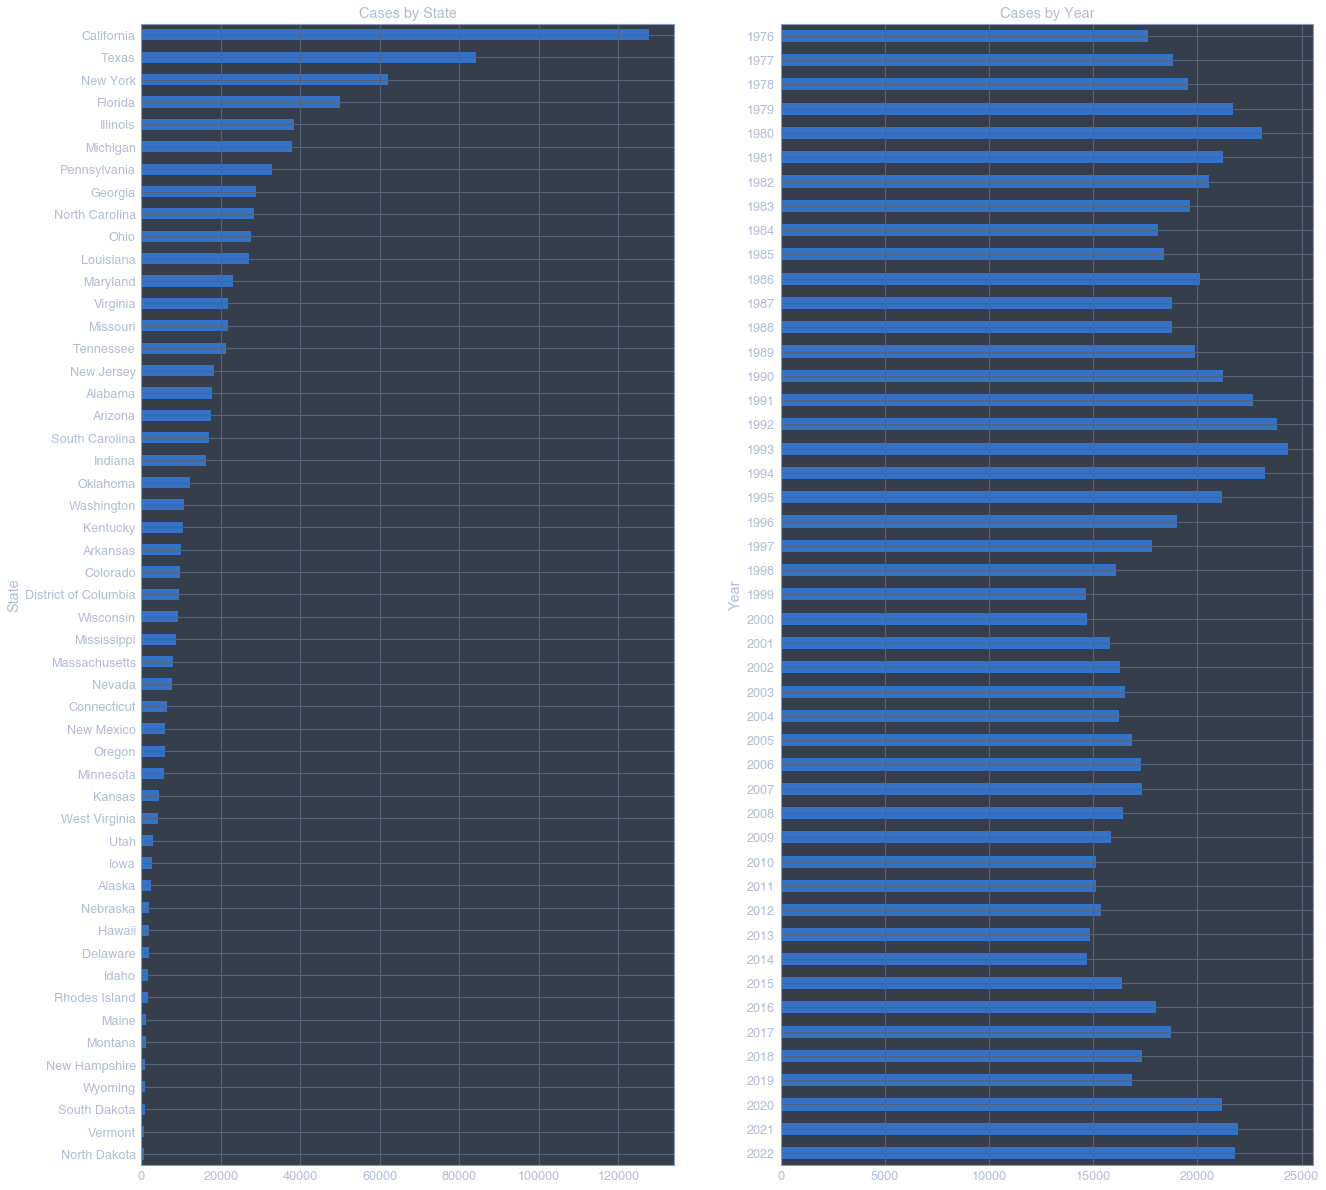

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

cases_by_state.plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title('Cases by State')

cases_by_year.plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title('Cases by Year')

In [21]:
relationship = map_data.groupby('Relationship').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
subcircum = map_data.groupby('Subcircum').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
situation = map_data.groupby('Situation').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
homicide = map_data.groupby('Homicide').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
circumstance = map_data.groupby('Circumstance').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
weapon = map_data.groupby('Weapon').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']

Text(0.5, 1.0, 'Cases by Homicide')

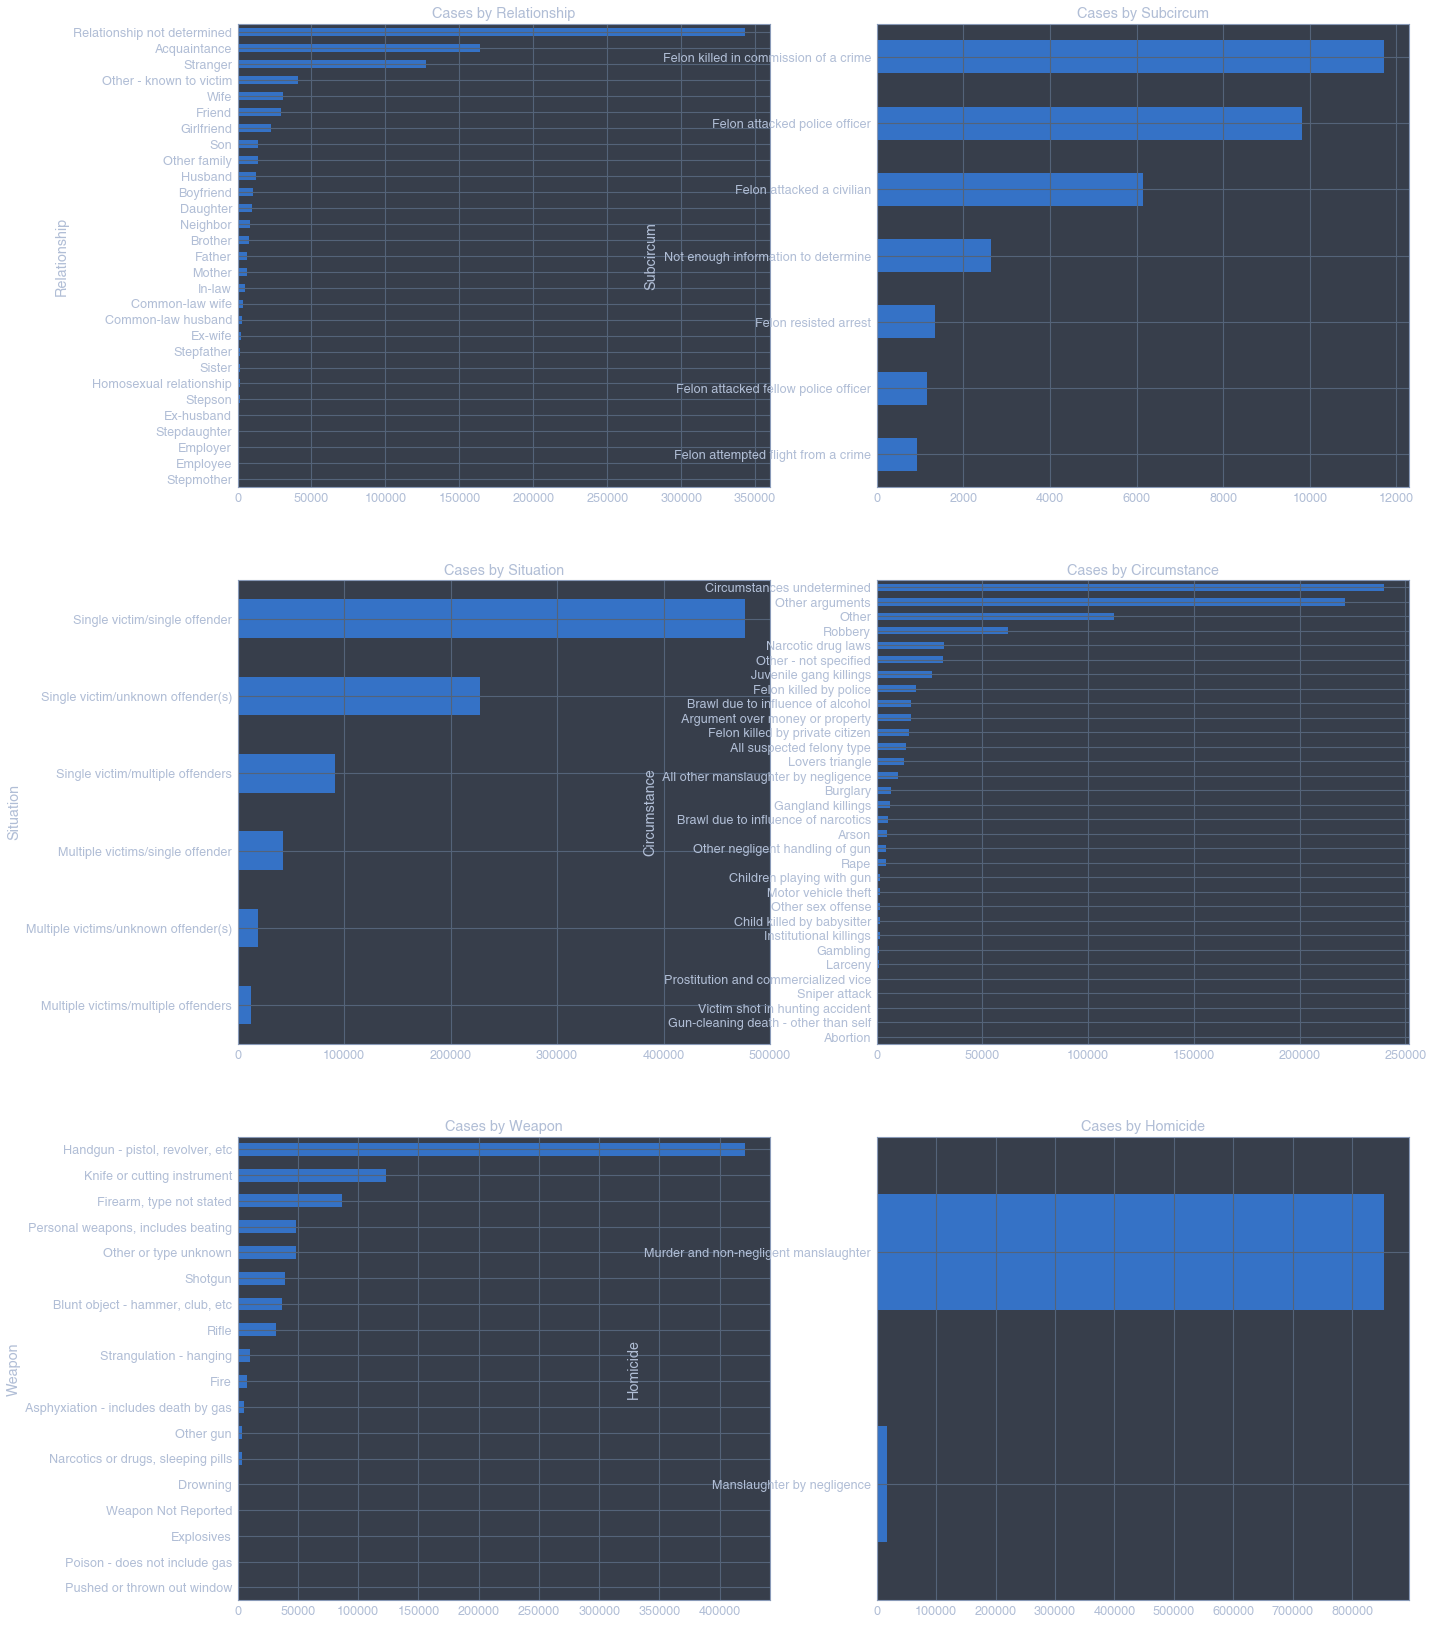

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(21, 29))

relationship.plot(kind='barh', ax=ax[0, 0]).invert_yaxis()
ax[0, 0].set_title('Cases by Relationship')

subcircum.plot(kind='barh', ax=ax[0, 1]).invert_yaxis()
ax[0, 1].set_title('Cases by Subcircum')

situation.plot(kind='barh', ax=ax[1, 0]).invert_yaxis()
ax[1, 0].set_title('Cases by Situation')

circumstance.plot(kind='barh', ax=ax[1, 1]).invert_yaxis()
ax[1, 1].set_title('Cases by Circumstance')

weapon.plot(kind='barh', ax=ax[2, 0]).invert_yaxis()
ax[2, 0].set_title('Cases by Weapon')

homicide.plot(kind='barh', ax=ax[2, 1]).invert_yaxis()
ax[2, 1].set_title('Cases by Homicide')

Text(0.5, 1.0, 'Murders by Month')

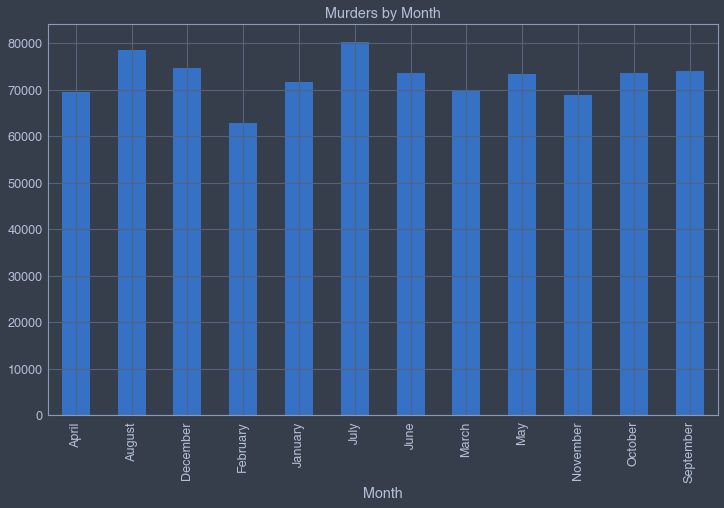

In [26]:
fig, ax = plt.subplots()
map_data.groupby('Month').count()['CNTYFIPS'].plot(kind='bar', ax=ax)
ax.set_title('Murders by Month')

Text(0.5, 1.0, 'Offenders Race')

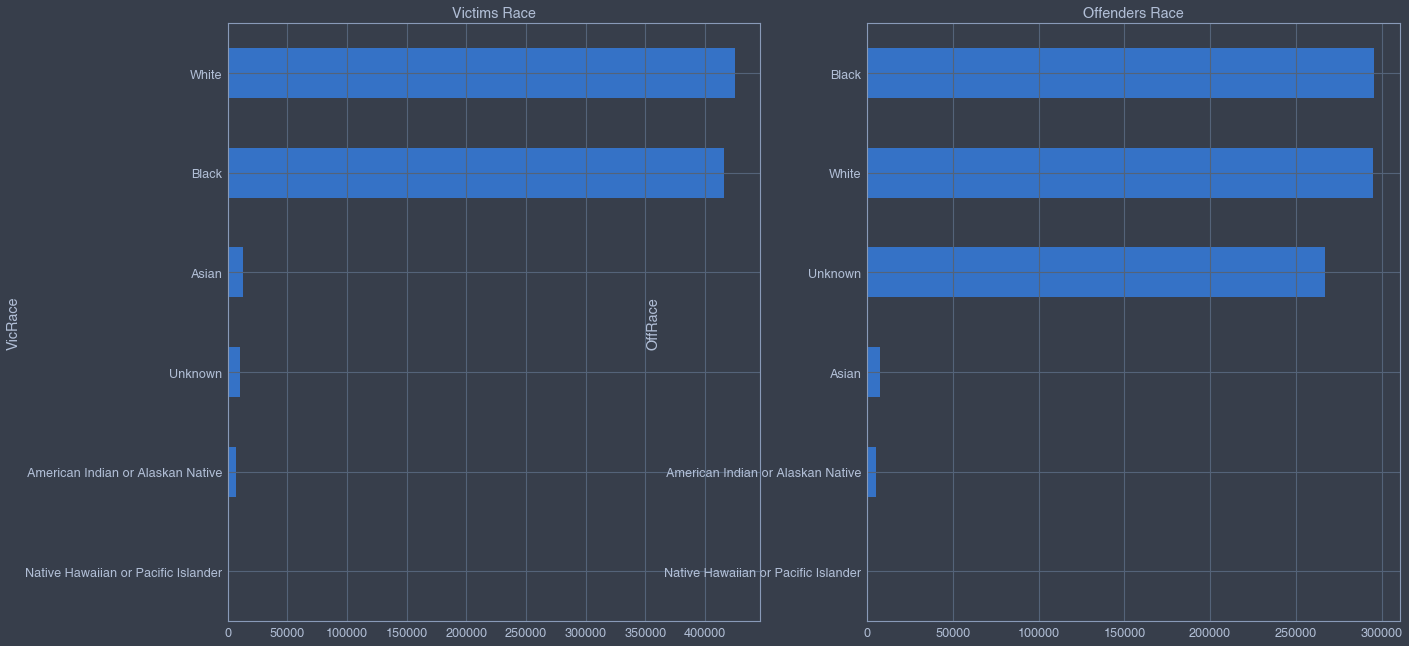

In [13]:
victim_race = map_data.groupby('VicRace').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
offender_race = map_data.groupby('OffRace').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']

fig, ax = plt.subplots(1, 2, figsize=(21, 11))

victim_race.plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title('Victims Race')

offender_race.plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title('Offenders Race')

Text(0.5, 1.0, 'Offender Age')

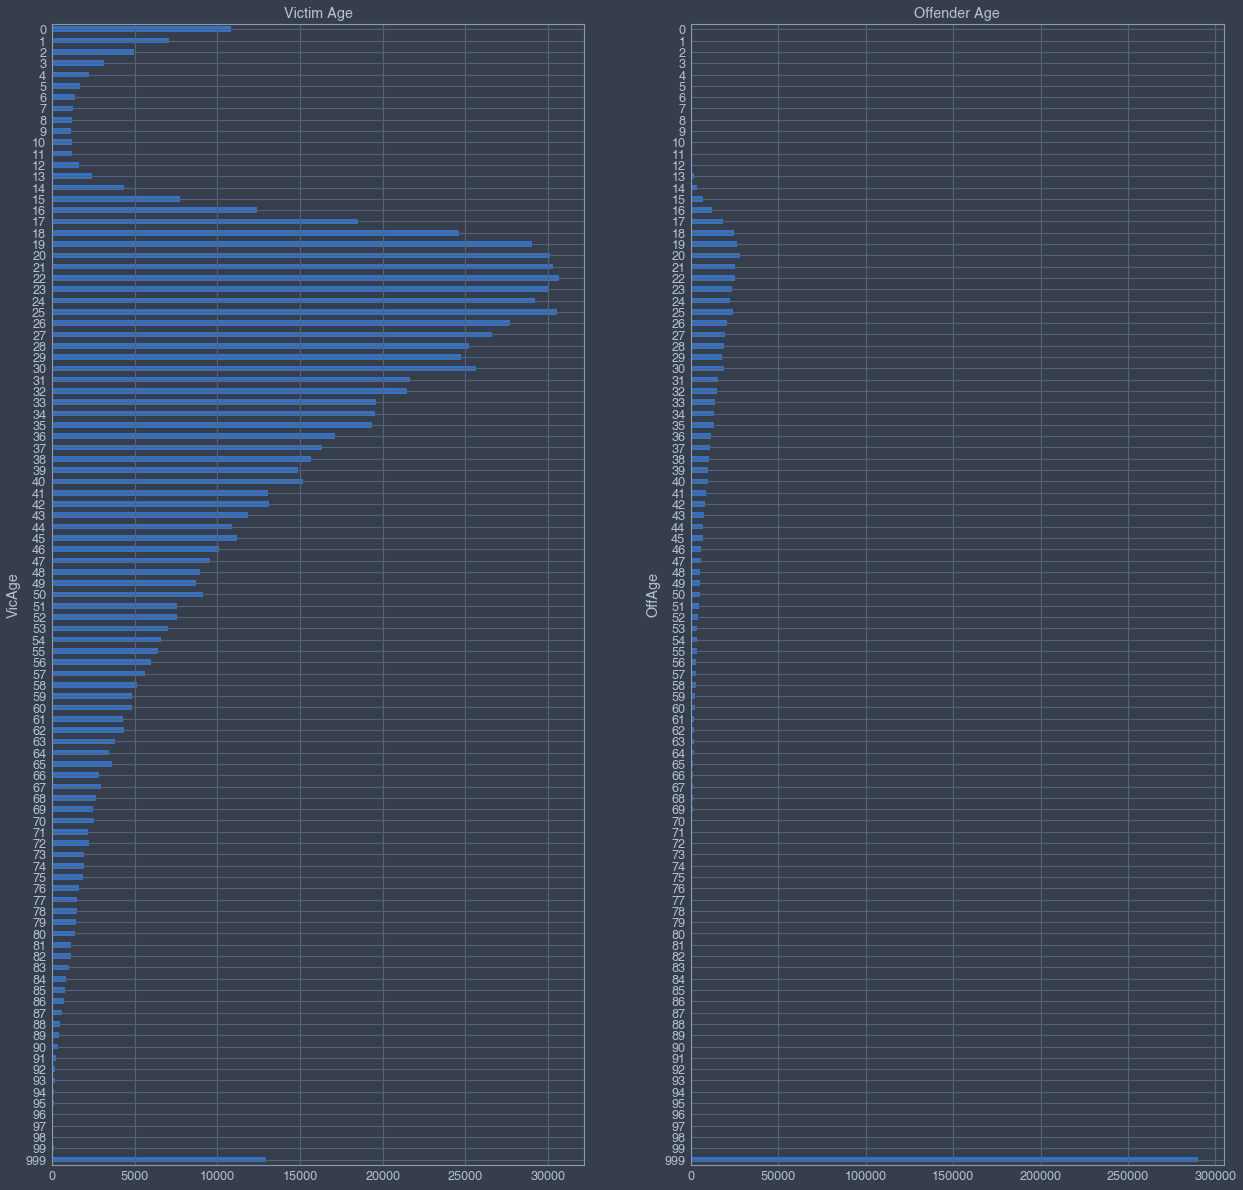

In [16]:
victim_age = map_data.groupby('VicAge').count()['CNTYFIPS']
offender_age = map_data.groupby('OffAge').count()['CNTYFIPS']

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

victim_age.plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title('Victim Age')

offender_age.plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title('Offender Age')

Text(0.5, 1.0, 'Agentype')

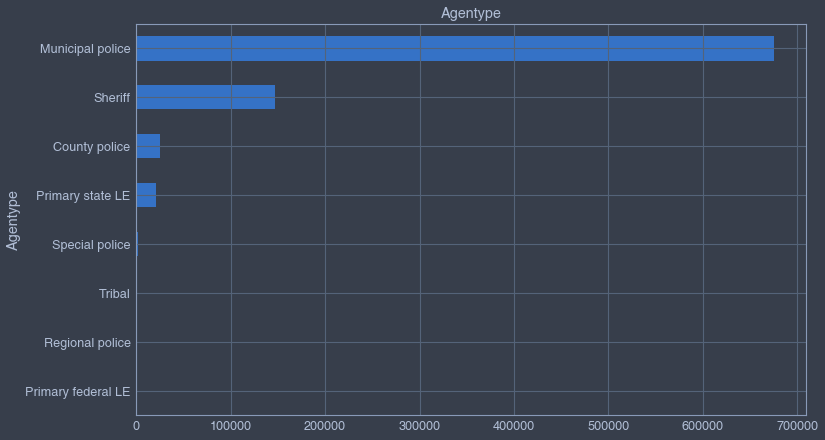

In [21]:
agentype = map_data.groupby('Agentype').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']

fig, ax = plt.subplots()
agentype.plot(kind='barh', ax=ax).invert_yaxis()
ax.set_title('Agentype')


In [35]:
map_data.groupby('Source').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Solved,Year,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Source,,,,,,,,,,,,,,,,,,,,,
FBI,831383,831383,831383,831383,831383,831383,831383,831383,831383,831383,...,831383,831383,831383,831383,831383,31905,831383,831383,804254,831383
MAP,39553,39553,39553,39553,39553,39553,39553,39553,39553,39553,...,39553,39553,39553,39553,39553,1861,39553,39553,36517,39553


<AxesSubplot:xlabel='Source'>

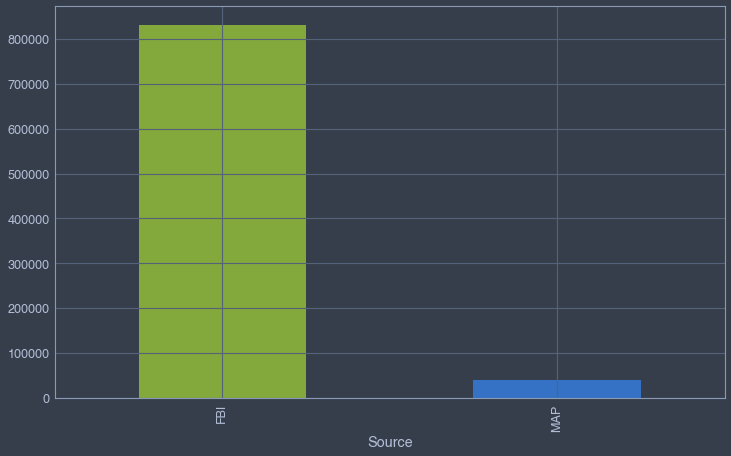

In [37]:
map_data.groupby('Source').count()['CNTYFIPS'].plot(kind='bar', color=colors['Source'])

## Solved and Not Solved Cases

In [4]:
map_data.groupby('Solved').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Year,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Solved,,,,,,,,,,,,,,,,,,,,,
No,256868,256868,256868,256868,256868,256868,256868,256868,256868,256868,...,256868,256868,256868,256868,256868,2683,256868,256868,249179,256868
Yes,614068,614068,614068,614068,614068,614068,614068,614068,614068,614068,...,614068,614068,614068,614068,614068,31083,614068,614068,591592,614068


<AxesSubplot:xlabel='Solved'>

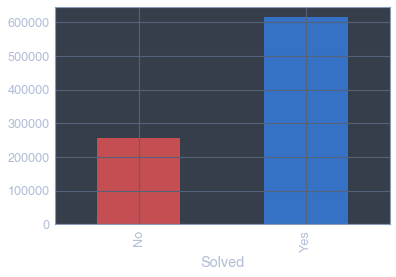

In [10]:
map_data.groupby('Solved').count()['CNTYFIPS'].plot(kind='bar', color=colors['Solved'])

In [5]:
not_solved_cases_by_state = map_data[map_data['Solved']=='No'].groupby('State')\
                                                              .count()\
                                                              .sort_values(by=['CNTYFIPS'],
                                                                           ascending=False)['CNTYFIPS'].to_frame()

solved_cases_by_state = map_data[map_data['Solved']=='Yes'].groupby('State')\
                                                           .count()\
                                                           .sort_values(by=['CNTYFIPS'],
                                                                        ascending=False)['CNTYFIPS']

cases_by_state = not_solved_cases_by_state.merge(solved_cases_by_state, on='State')

cases_by_state.rename(columns={'CNTYFIPS_x': 'Not Solved',
                               'CNTYFIPS_y': 'Solved'}, inplace=True)


In [6]:
not_solved_cases_by_year = map_data[map_data['Solved']=='No'].groupby('Year')\
                                                              .count()['CNTYFIPS'].to_frame()

solved_cases_by_year = map_data[map_data['Solved']=='Yes'].groupby('Year')\
                                                          .count()['CNTYFIPS']

cases_by_year = not_solved_cases_by_year.merge(solved_cases_by_year, on='Year')

cases_by_year.rename(columns={'CNTYFIPS_x': 'Not Solved',
                              'CNTYFIPS_y': 'Solved'}, inplace=True)

Text(0.5, 1.0, 'Cases by Year')

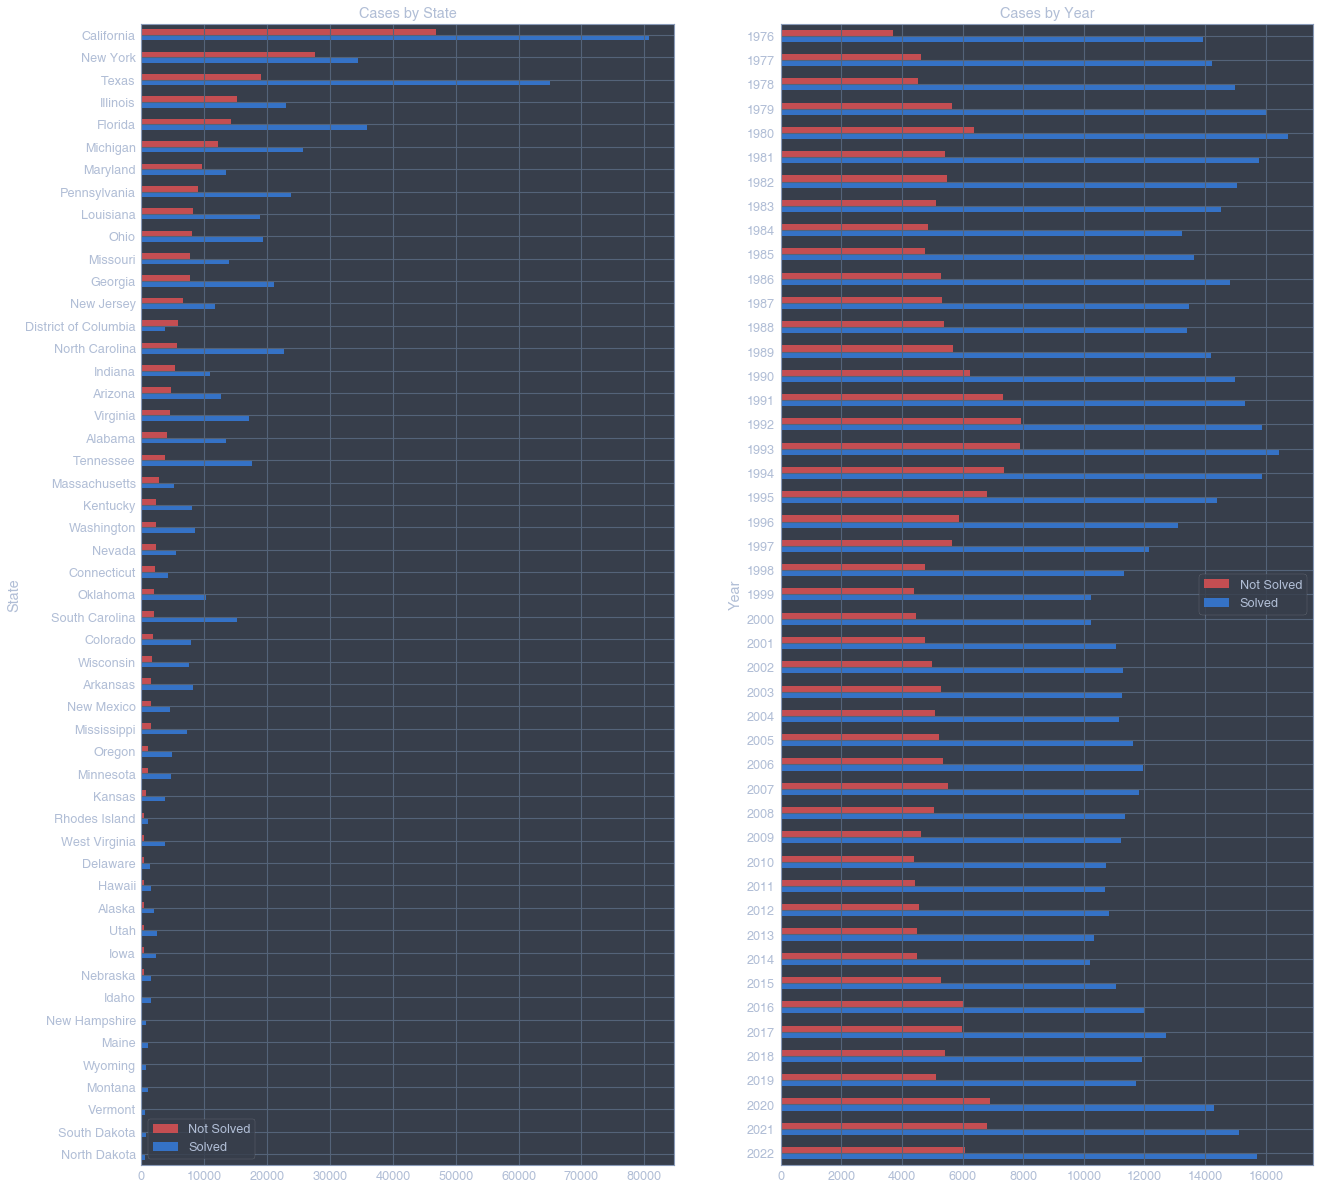

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

cases_by_state.plot(kind='barh', ax=ax[0], color=colors['Solved']).invert_yaxis()
ax[0].set_title('Cases by State')

cases_by_year.plot(kind='barh', ax=ax[1], color=colors['Solved']).invert_yaxis()
ax[1].set_title('Cases by Year')

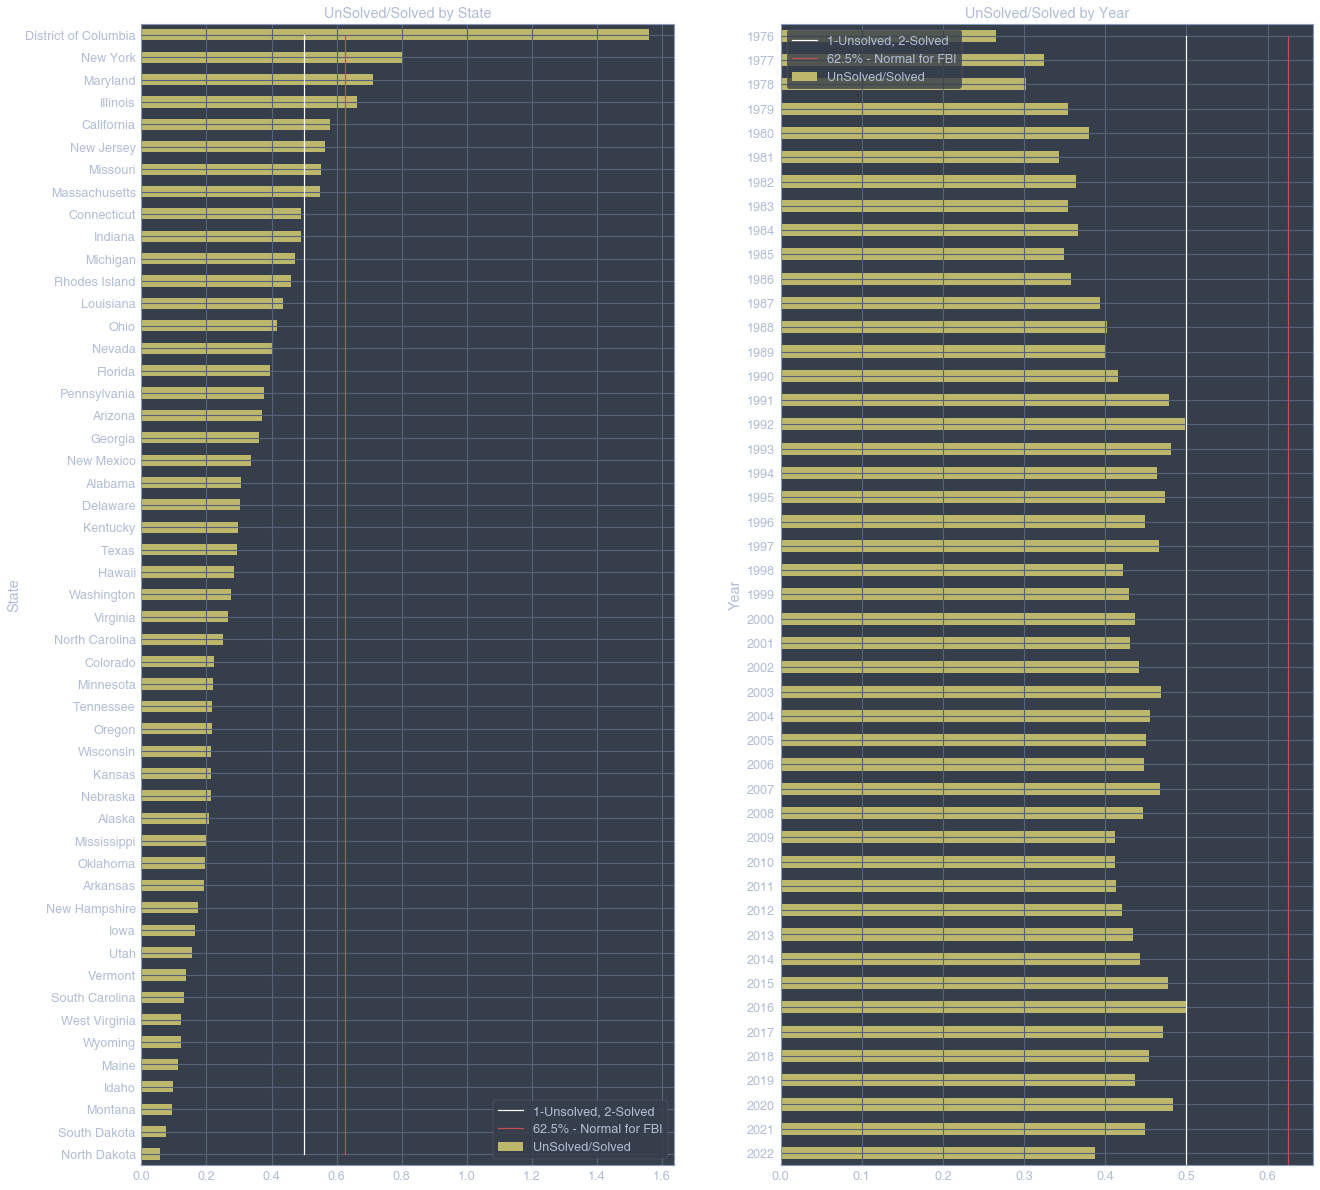

In [7]:
cases_by_state['UnSolved/Solved'] = cases_by_state['Not Solved'] / cases_by_state['Solved']
cases_by_state.sort_values(by=['UnSolved/Solved'], ascending=True, inplace=True)

cases_by_year['UnSolved/Solved'] = cases_by_year['Not Solved'] / cases_by_year['Solved']

x_state = cases_by_state.shape[0]
x_year = cases_by_year.shape[0]
y_state = cases_by_state.index
y_year = cases_by_year.index

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

cases_by_state['UnSolved/Solved'].plot(kind='barh', ax=ax[0], color='darkkhaki')
ax[0].plot([0.5]*x_state, y_state, color='w', label='1-Unsolved, 2-Solved')
ax[0].plot([0.625]*x_state, y_state, color='r', label='62.5% - Normal for FBI')

cases_by_year['UnSolved/Solved'].plot(kind='barh', ax=ax[1], color='darkkhaki').invert_yaxis()
ax[1].plot([0.5]*x_state, y_state, color='w', label='1-Unsolved, 2-Solved') # problem w/ x_year and y_year
ax[1].plot([0.625]*x_state, y_state, color='r', label='62.5% - Normal for FBI') # problem w/ x_year and y_year

ax[0].set_title('UnSolved/Solved by State')
ax[1].set_title('UnSolved/Solved by Year')
ax[0].legend()
ax[1].legend()

In [8]:
female_not_solved_cases_by_state = map_data[(map_data['Solved']=='No')
                                            & (map_data['VicSex']=='Female')].groupby('State')\
                                                                             .count()\
                                                                             .sort_values(by=['CNTYFIPS'],
                                                                                          ascending=False)['CNTYFIPS'].to_frame()

female_solved_cases_by_state = map_data[(map_data['Solved']=='Yes')
                                        & (map_data['VicSex']=='Female')].groupby('State')\
                                                                         .count()\
                                                                         .sort_values(by=['CNTYFIPS'],
                                                                                      ascending=False)['CNTYFIPS']

female_cases_by_state = female_not_solved_cases_by_state.merge(female_solved_cases_by_state, on='State')

female_cases_by_state.rename(columns={'CNTYFIPS_x': 'Not Solved',
                                      'CNTYFIPS_y': 'Solved'}, inplace=True)

In [9]:
female_not_solved_cases_by_year = map_data[(map_data['Solved']=='No')
                                            & (map_data['VicSex']=='Female')].groupby('Year')\
                                                                             .count()['CNTYFIPS'].to_frame()

female_solved_cases_by_year = map_data[(map_data['Solved']=='Yes')
                                        & (map_data['VicSex']=='Female')].groupby('Year')\
                                                                         .count()['CNTYFIPS']

female_cases_by_year = female_not_solved_cases_by_year.merge(female_solved_cases_by_year, on='Year')

female_cases_by_year.rename(columns={'CNTYFIPS_x': 'Not Solved',
                                      'CNTYFIPS_y': 'Solved'}, inplace=True)

Text(0.5, 1.0, 'Female Victims by Year')

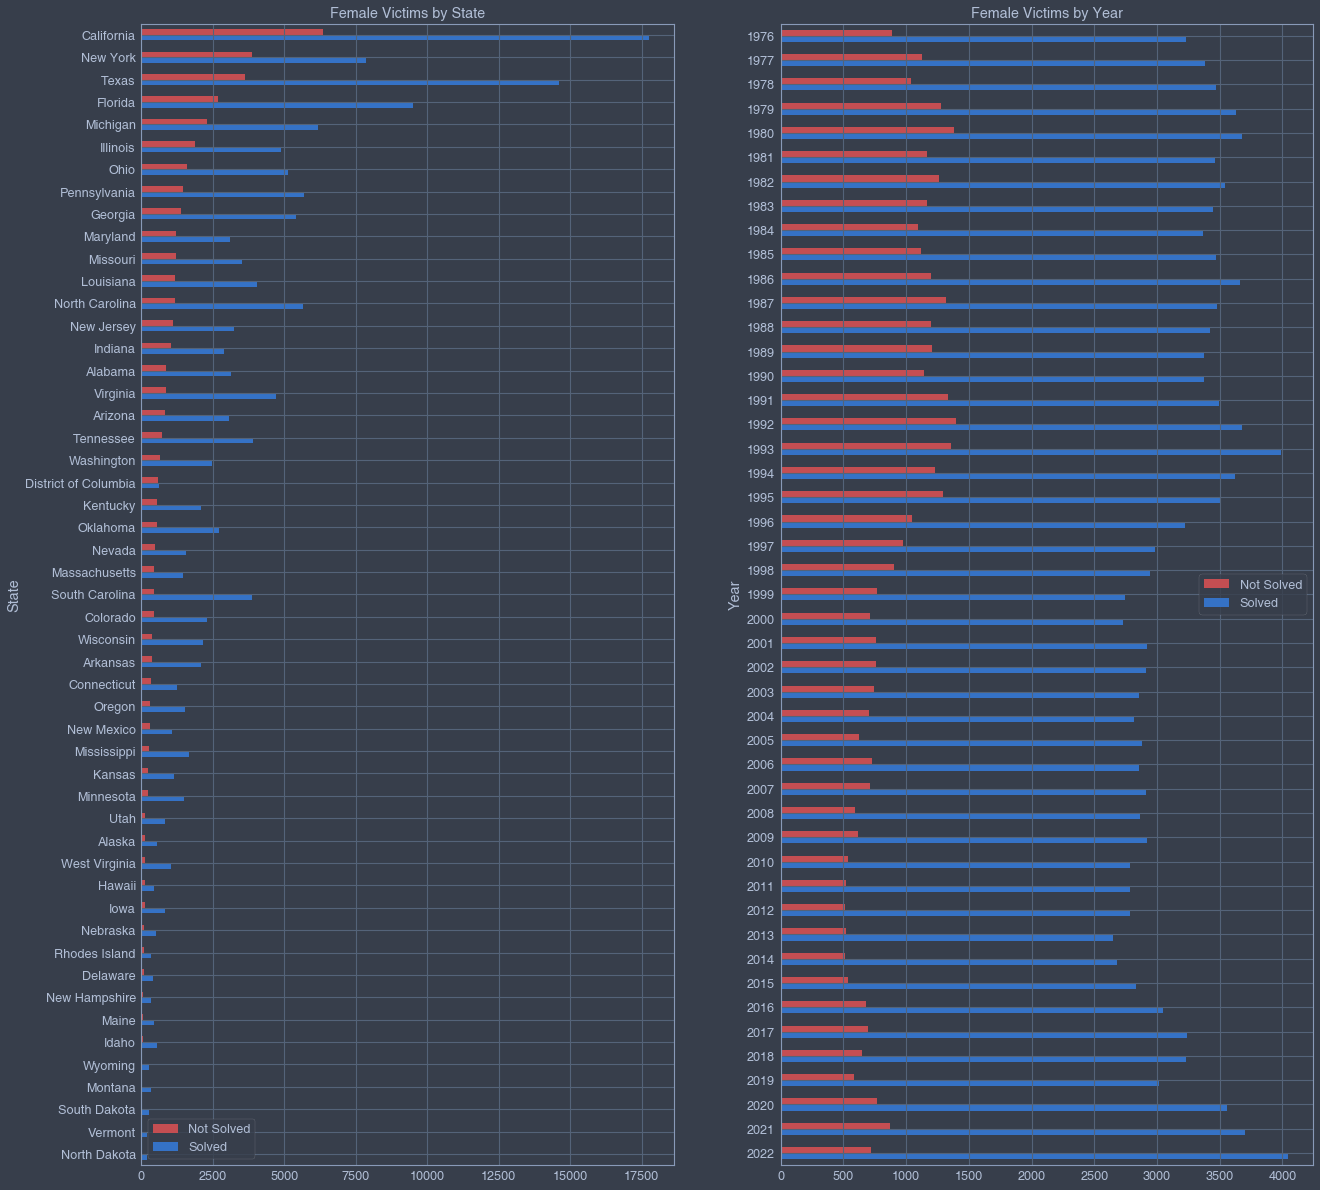

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

female_cases_by_state.plot(kind='barh', ax=ax[0], color=colors['Solved']).invert_yaxis()
ax[0].set_title('Female Victims by State')

female_cases_by_year.plot(kind='barh', ax=ax[1], color=colors['Solved']).invert_yaxis()
ax[1].set_title('Female Victims by Year')

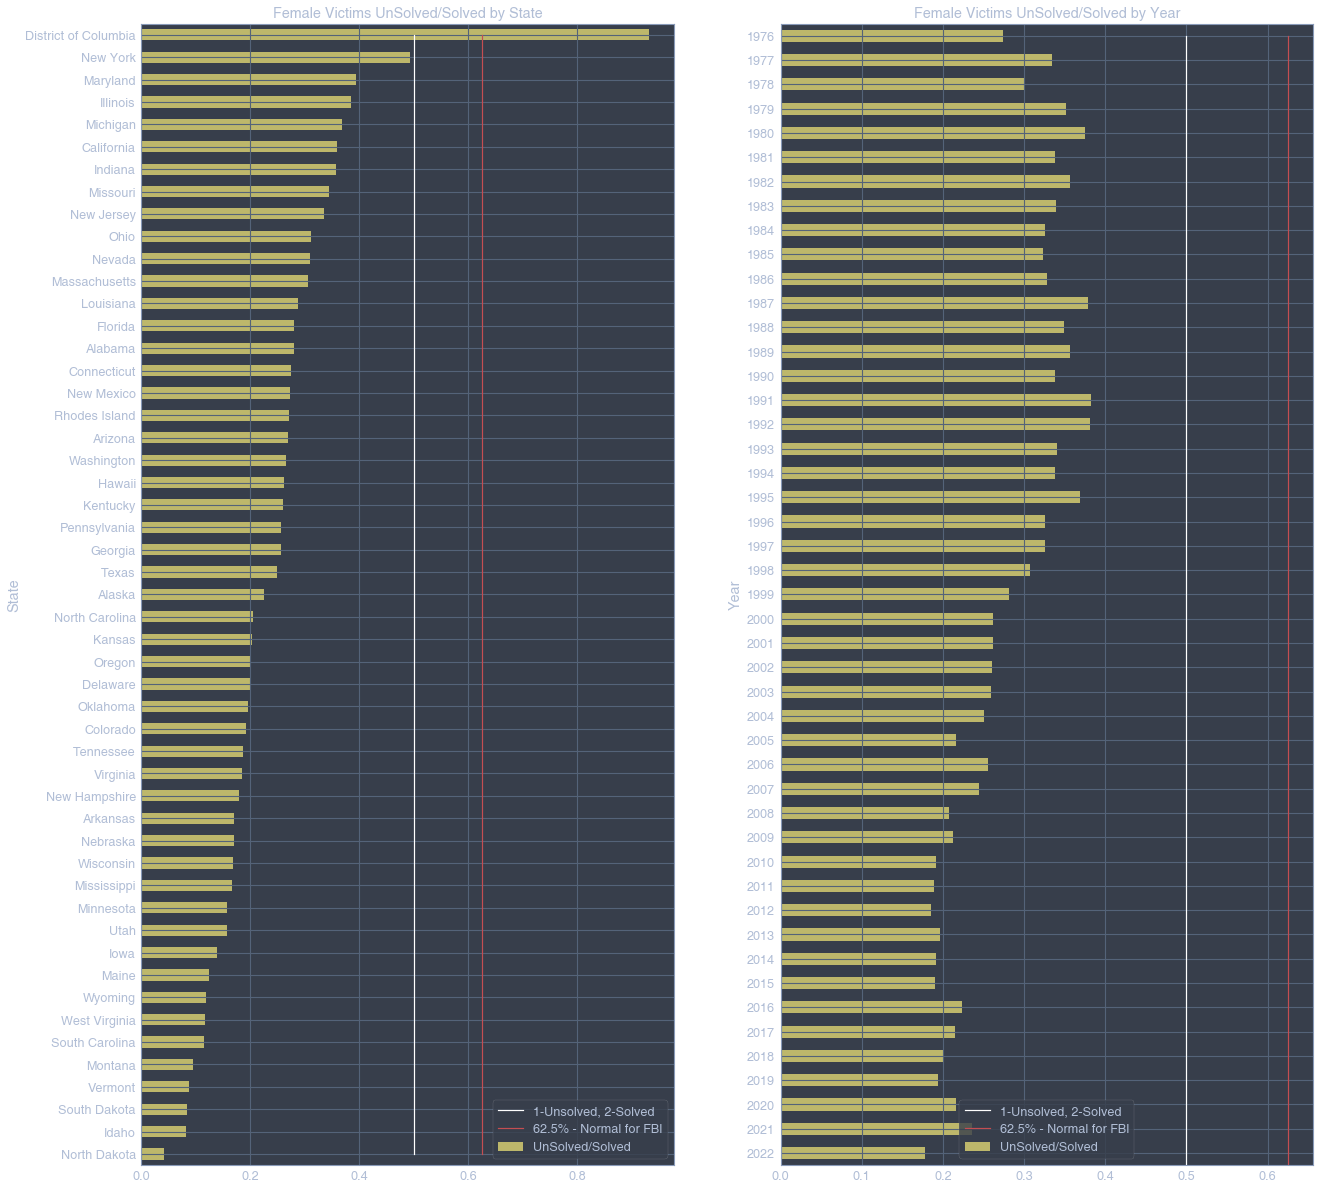

In [8]:
female_cases_by_state['UnSolved/Solved'] = female_cases_by_state['Not Solved'] / female_cases_by_state['Solved']
female_cases_by_state.sort_values(by=['UnSolved/Solved'], ascending=True, inplace=True)

female_cases_by_year['UnSolved/Solved'] = female_cases_by_year['Not Solved'] / female_cases_by_year['Solved']

x_state = female_cases_by_state.shape[0]
x_year = female_cases_by_year.shape[0]
y_state = female_cases_by_state.index
y_year = female_cases_by_year.index

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

female_cases_by_state['UnSolved/Solved'].plot(kind='barh', ax=ax[0], color='darkkhaki')
ax[0].plot([0.5]*x_state, y_state, color='w', label='1-Unsolved, 2-Solved')
ax[0].plot([0.625]*x_state, y_state, color='r', label='62.5% - Normal for FBI')

female_cases_by_year['UnSolved/Solved'].plot(kind='barh', ax=ax[1], color='darkkhaki').invert_yaxis()
ax[1].plot([0.5]*x_state, y_state, color='w', label='1-Unsolved, 2-Solved') # problem w/ x_year and y_year
ax[1].plot([0.625]*x_state, y_state, color='r', label='62.5% - Normal for FBI') # problem w/ x_year and y_year

ax[0].set_title('Female Victims UnSolved/Solved by State')
ax[1].set_title('Female Victims UnSolved/Solved by Year')
ax[0].legend()
ax[1].legend()

In [32]:
male_not_solved_cases_by_state = map_data[(map_data['Solved']=='No')
                                          & (map_data['VicSex']=='Male')].groupby('State')\
                                                                         .count()\
                                                                         .sort_values(by=['CNTYFIPS'],
                                                                                      ascending=False)['CNTYFIPS'].to_frame()

male_solved_cases_by_state = map_data[(map_data['Solved']=='Yes')
                                      & (map_data['VicSex']=='Male')].groupby('State')\
                                                                     .count()\
                                                                     .sort_values(by=['CNTYFIPS'],
                                                                                  ascending=False)['CNTYFIPS']

male_cases_by_state = male_not_solved_cases_by_state.merge(male_solved_cases_by_state, on='State')

male_cases_by_state.rename(columns={'CNTYFIPS_x': 'Not Solved',
                                    'CNTYFIPS_y': 'Solved'}, inplace=True)

In [33]:
male_not_solved_cases_by_year = map_data[(map_data['Solved']=='No')
                                         & (map_data['VicSex']=='Male')].groupby('Year')\
                                                                          .count()['CNTYFIPS'].to_frame()

male_solved_cases_by_year = map_data[(map_data['Solved']=='Yes')
                                     & (map_data['VicSex']=='Male')].groupby('Year')\
                                                                      .count()['CNTYFIPS']

male_cases_by_year = male_not_solved_cases_by_year.merge(male_solved_cases_by_year, on='Year')

male_cases_by_year.rename(columns={'CNTYFIPS_x': 'Not Solved',
                                   'CNTYFIPS_y': 'Solved'}, inplace=True)

Text(0.5, 1.0, 'Male Victims by Year')

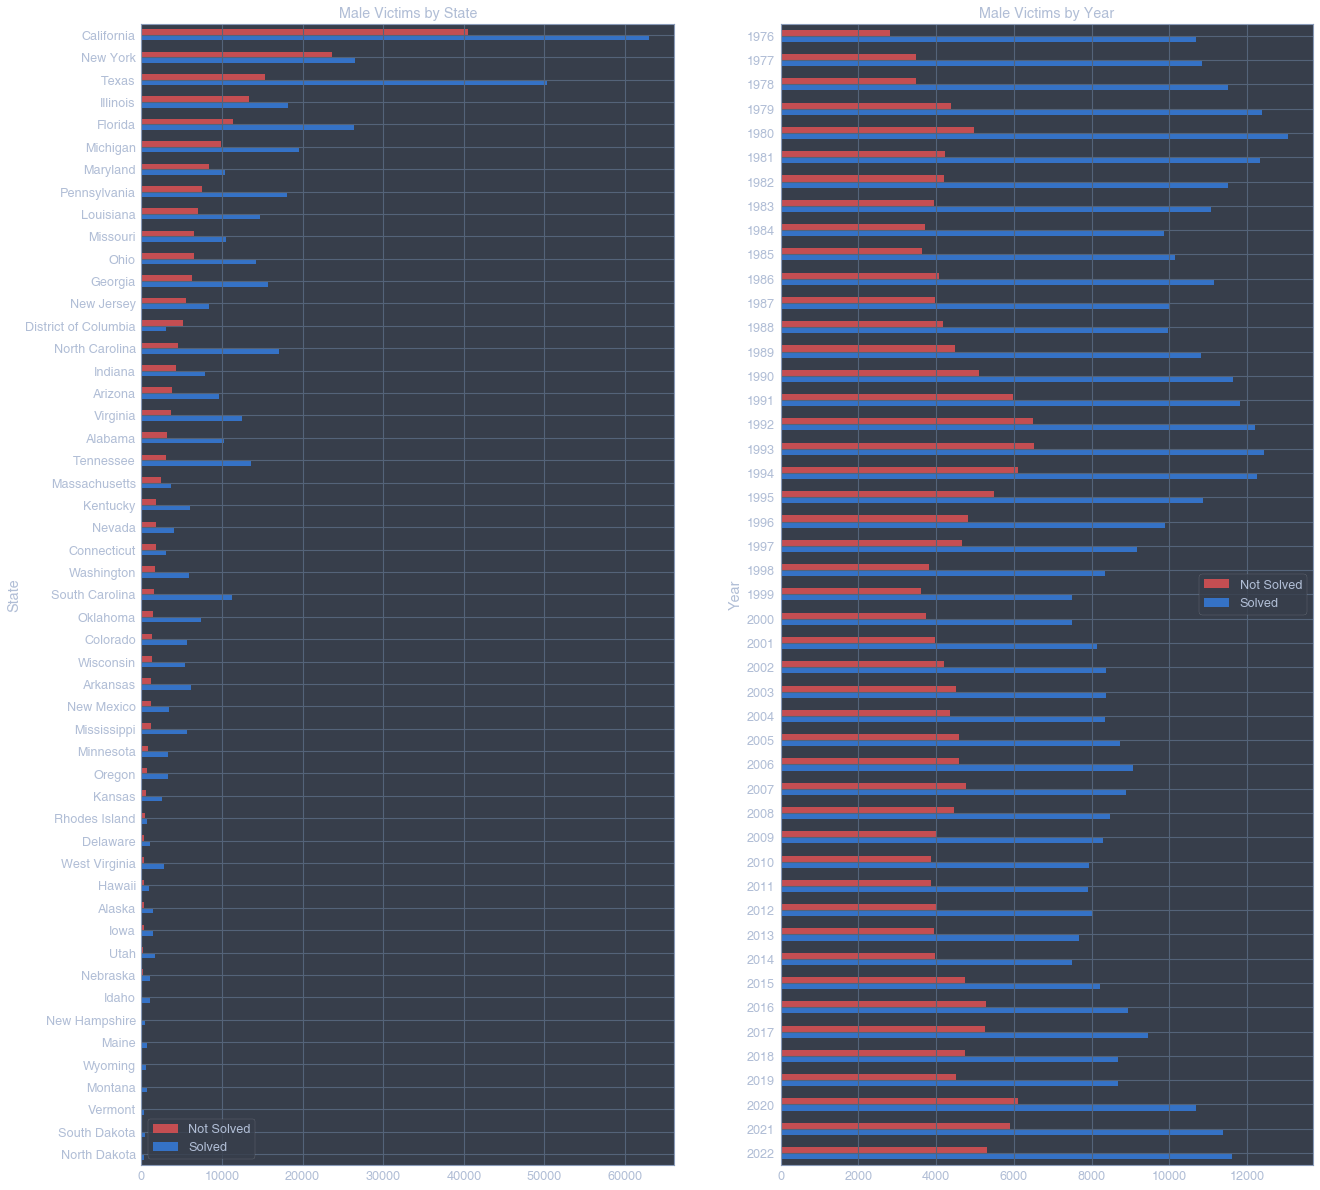

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

male_cases_by_state.plot(kind='barh', ax=ax[0], color=colors['Solved']).invert_yaxis()
ax[0].set_title('Male Victims by State')

male_cases_by_year.plot(kind='barh', ax=ax[1], color=colors['Solved']).invert_yaxis()
ax[1].set_title('Male Victims by Year')

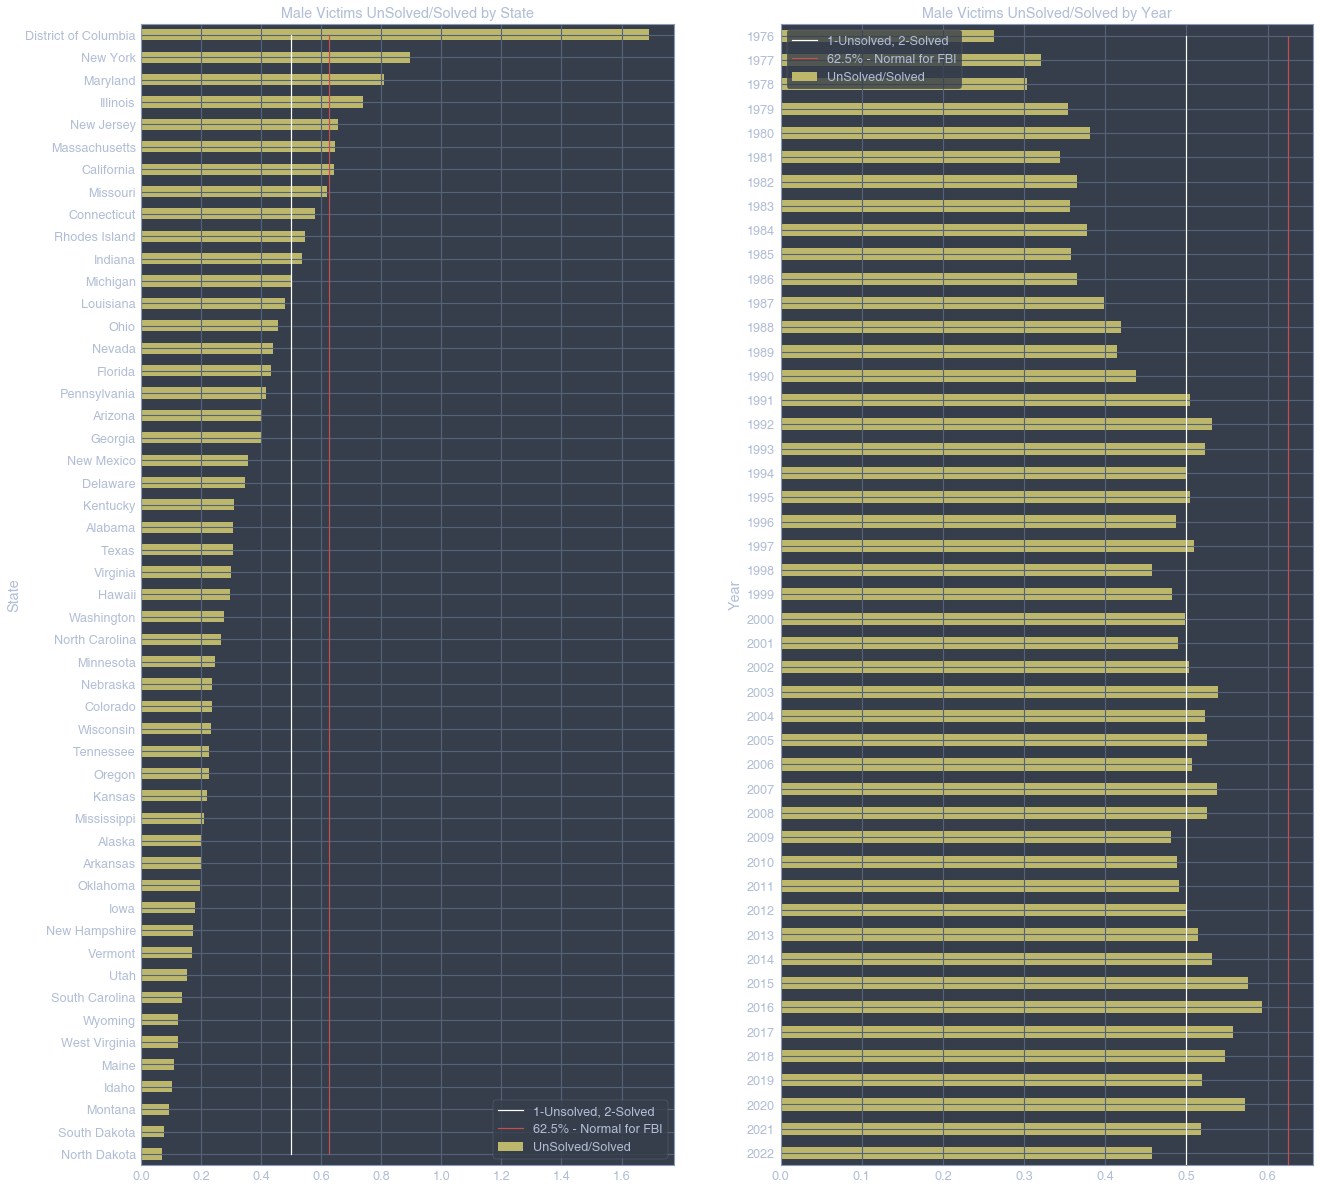

In [34]:
male_cases_by_state['UnSolved/Solved'] = male_cases_by_state['Not Solved'] / male_cases_by_state['Solved']
male_cases_by_state.sort_values(by=['UnSolved/Solved'], ascending=True, inplace=True)

male_cases_by_year['UnSolved/Solved'] = male_cases_by_year['Not Solved'] / male_cases_by_year['Solved']

x_state = male_cases_by_state.shape[0]
x_year = male_cases_by_year.shape[0]
y_state = male_cases_by_state.index
y_year = male_cases_by_year.index

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

male_cases_by_state['UnSolved/Solved'].plot(kind='barh', ax=ax[0], color='darkkhaki')
ax[0].plot([0.5]*x_state, y_state, color='w', label='1-Unsolved, 2-Solved')
ax[0].plot([0.625]*x_state, y_state, color='r', label='62.5% - Normal for FBI')

male_cases_by_year['UnSolved/Solved'].plot(kind='barh', ax=ax[1], color='darkkhaki').invert_yaxis()
ax[1].plot([0.5]*x_state, y_state, color='w', label='1-Unsolved, 2-Solved') # problem w/ x_year and y_year
ax[1].plot([0.625]*x_state, y_state, color='r', label='62.5% - Normal for FBI') # problem w/ x_year and y_year

ax[0].set_title('Male Victims UnSolved/Solved by State')
ax[1].set_title('Male Victims UnSolved/Solved by Year')
ax[0].legend()
ax[1].legend()

Text(0.5, 1.0, 'UnSolved/Solved by Year')

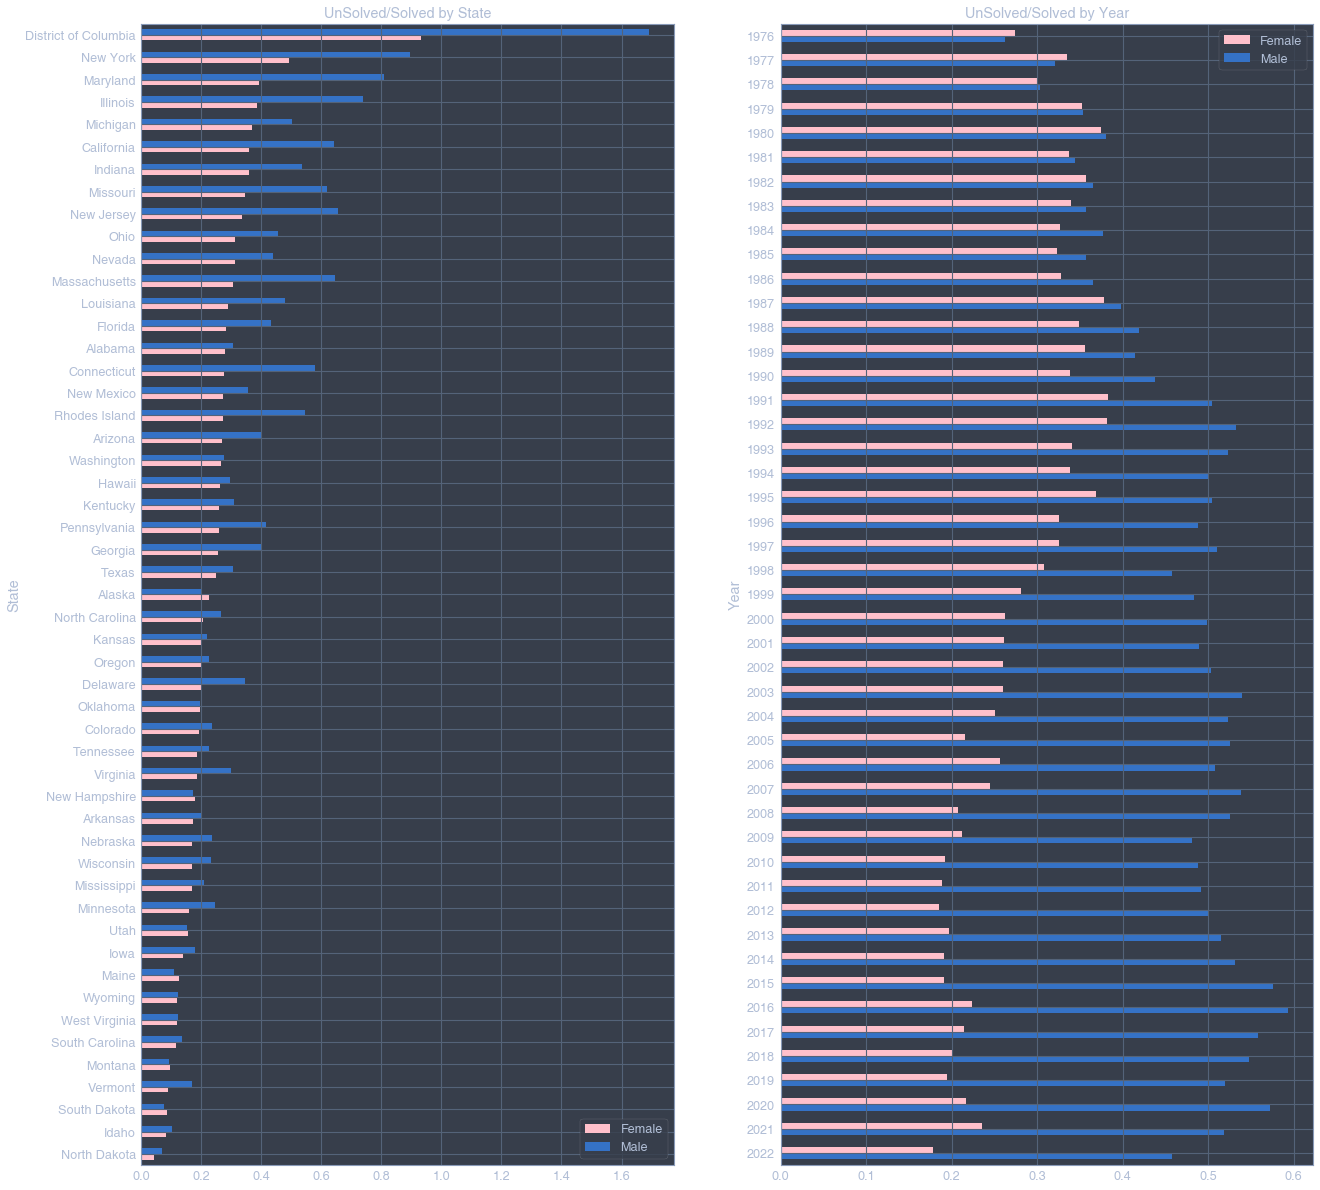

In [21]:
solved_un_solved_by_state = female_cases_by_state['UnSolved/Solved'].to_frame()\
                                                                    .merge(male_cases_by_state['UnSolved/Solved'],
                                                                           on='State')
solved_un_solved_by_state.rename(columns={'UnSolved/Solved_x': 'Female',
                                          'UnSolved/Solved_y': 'Male'}, inplace=True)

solved_un_solved_by_year = female_cases_by_year['UnSolved/Solved'].to_frame()\
                                                                  .merge(male_cases_by_year['UnSolved/Solved'],
                                                                         on='Year')
solved_un_solved_by_year.rename(columns={'UnSolved/Solved_x': 'Female',
                                         'UnSolved/Solved_y': 'Male'}, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

solved_un_solved_by_state.plot(kind='barh', ax=ax[0], color=colors['Sex'])
ax[0].set_title('UnSolved/Solved by State')

solved_un_solved_by_year.plot(kind='barh', ax=ax[1], color=colors['Sex']).invert_yaxis()
ax[1].set_title('UnSolved/Solved by Year')

## Victim's sex is unknown

In [17]:
vic_sex_unknown = map_data[map_data['VicSex']=='Unknown']
vic_sex_unknown.groupby('Solved').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Year,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Solved,,,,,,,,,,,,,,,,,,,,,
No,913,913,913,913,913,913,913,913,913,913,...,913,913,913,913,913,11,913,913,871,913
Yes,661,661,661,661,661,661,661,661,661,661,...,661,661,661,661,661,20,661,661,591,661


<AxesSubplot:xlabel='Solved'>

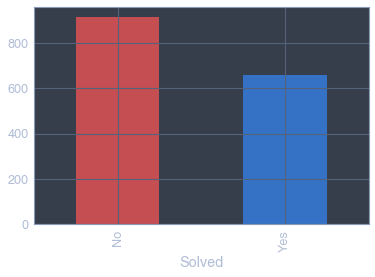

In [18]:
vic_sex_unknown.groupby('Solved').count()['CNTYFIPS'].plot(kind='bar', color=colors['Solved'])

Text(0.5, 1.0, "Victim's Sex is Unknown by Year")

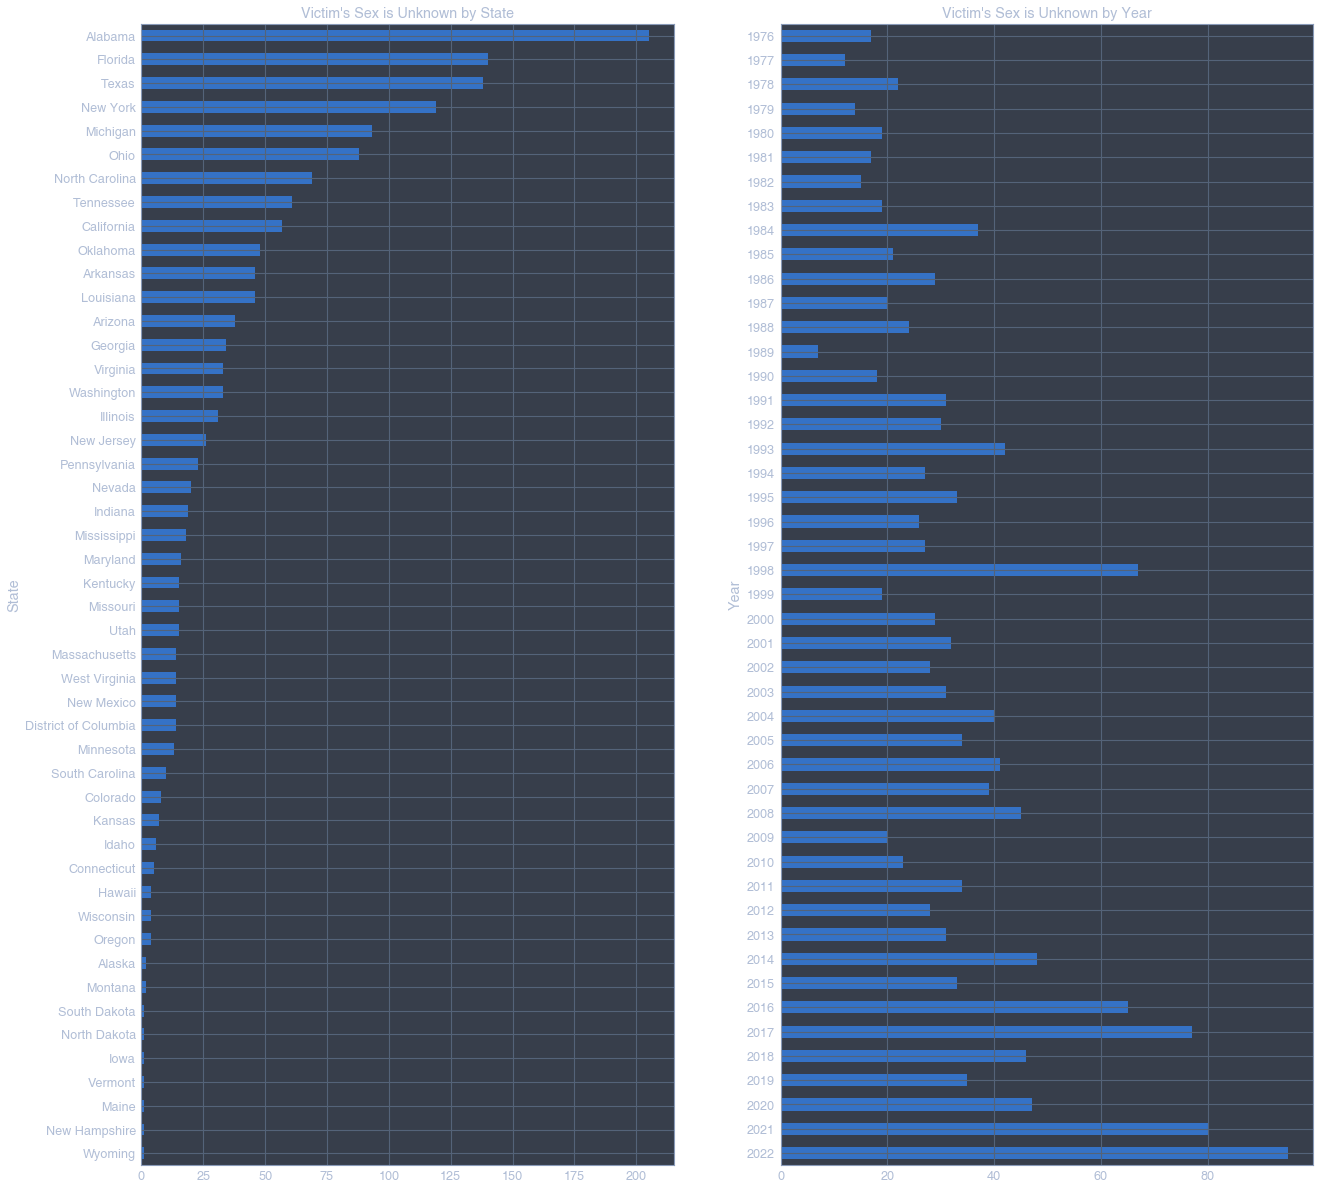

In [21]:
vic_sex_unknown_by_state = vic_sex_unknown.groupby('State')\
                                          .count()\
                                          .sort_values(by=['CNTYFIPS'],
                                                       ascending=True)['CNTYFIPS']

vic_sex_unknown_by_year = vic_sex_unknown.groupby('Year')\
                                         .count()['CNTYFIPS']

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

vic_sex_unknown_by_state.plot(kind='barh', ax=ax[0], color='b')
ax[0].set_title('Victim\'s Sex is Unknown by State')

vic_sex_unknown_by_year.plot(kind='barh', ax=ax[1], color='b').invert_yaxis()
ax[1].set_title('Victim\'s Sex is Unknown by Year')

Text(0.5, 1.0, "Victim's Sex is Unknown by Circumstance")

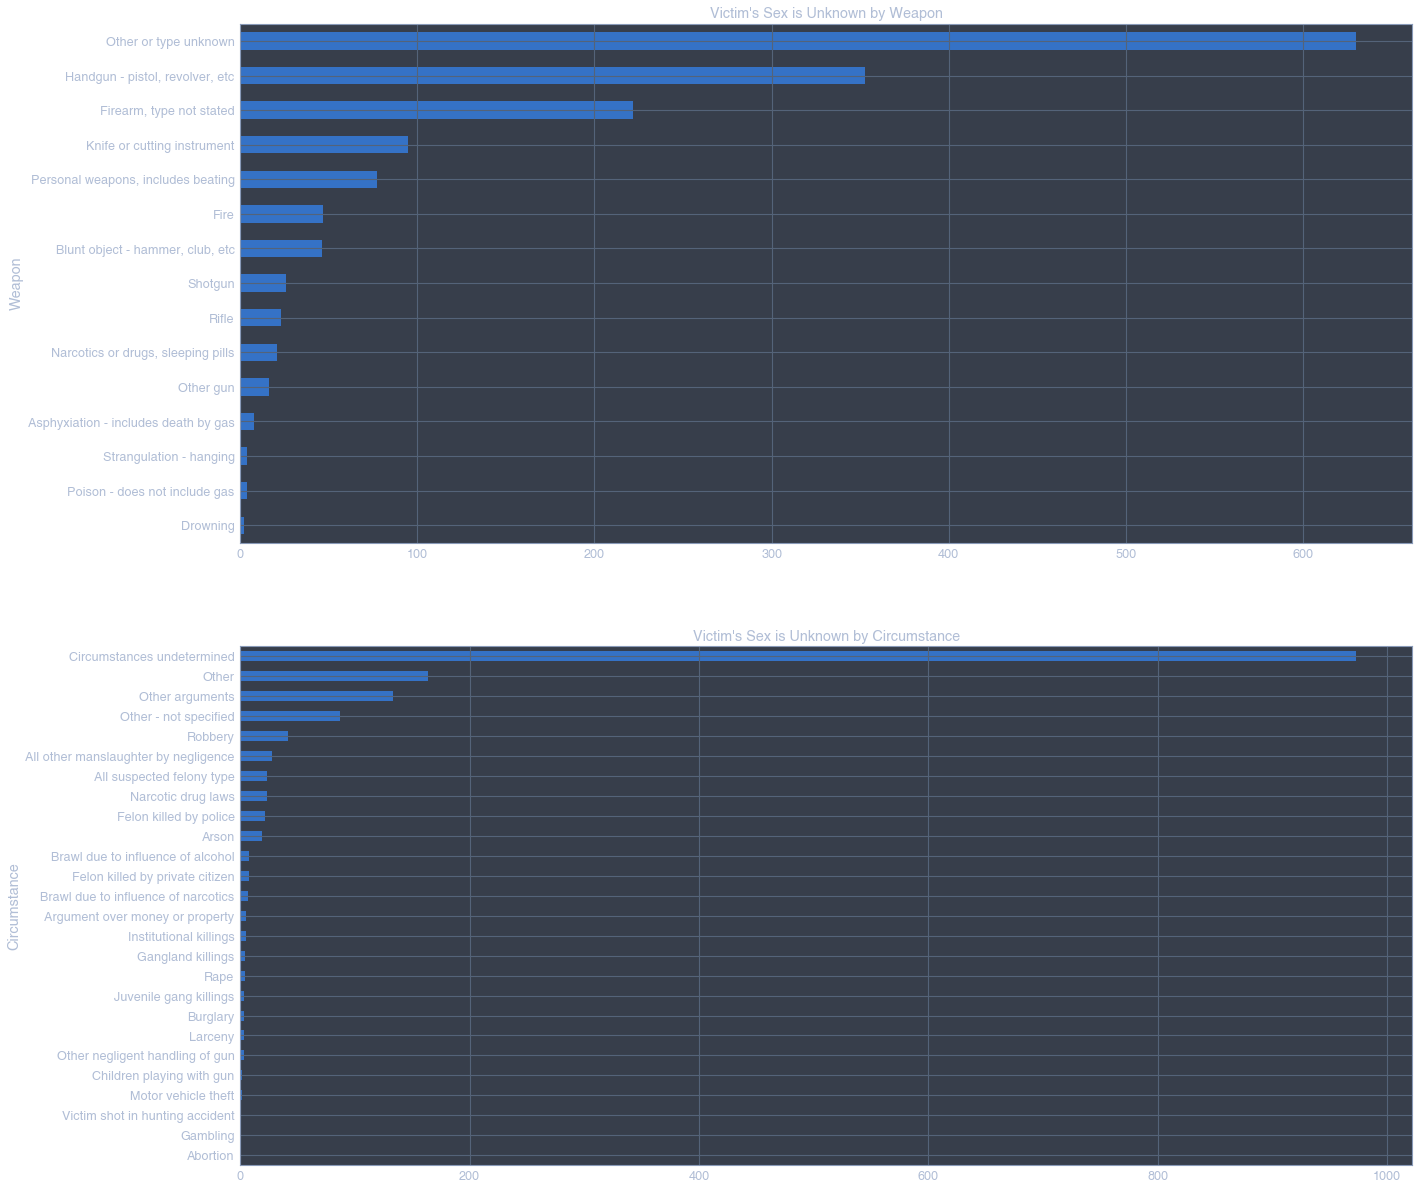

In [24]:
vic_sex_unknown_by_weapon = vic_sex_unknown.groupby('Weapon')\
                                           .count()\
                                           .sort_values(by=['CNTYFIPS'],
                                                        ascending=True)['CNTYFIPS']

vic_sex_unknown_by_circumstance = vic_sex_unknown.groupby('Circumstance')\
                                                 .count()\
                                                 .sort_values(by=['CNTYFIPS'],
                                                              ascending=True)['CNTYFIPS']

fig, ax = plt.subplots(2, 1, figsize=(21, 21))

vic_sex_unknown_by_weapon.plot(kind='barh', ax=ax[0], color='b')
ax[0].set_title('Victim\'s Sex is Unknown by Weapon')

vic_sex_unknown_by_circumstance.plot(kind='barh', ax=ax[1], color='b')
ax[1].set_title('Victim\'s Sex is Unknown by Circumstance')

## Offender's sex is unknown

In [7]:
map_data.groupby('OffSex').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
OffSex,,,,,,,,,,,,,,,,,,,,,
Female,68968,68968,68968,68968,68968,68968,68968,68968,68968,68968,...,68968,68968,68968,68968,68968,2232,68968,68968,66345,68968
Male,543384,543384,543384,543384,543384,543384,543384,543384,543384,543384,...,543384,543384,543384,543384,543384,28849,543384,543384,523730,543384
Unknown,258584,258584,258584,258584,258584,258584,258584,258584,258584,258584,...,258584,258584,258584,258584,258584,2685,258584,258584,250696,258584


In [10]:
off_sex_unknown = map_data[map_data['OffSex']=='Unknown']
off_sex_unknown.groupby('Solved').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Year,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Solved,,,,,,,,,,,,,,,,,,,,,
No,256457,256457,256457,256457,256457,256457,256457,256457,256457,256457,...,256457,256457,256457,256457,256457,2672,256457,256457,248792,256457
Yes,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,...,2127,2127,2127,2127,2127,13,2127,2127,1904,2127


<AxesSubplot:xlabel='Solved'>

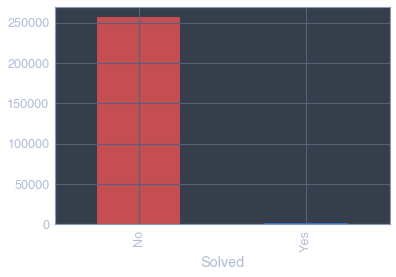

In [11]:
off_sex_unknown.groupby('Solved').count()['CNTYFIPS'].plot(kind='bar', color=colors['Solved'])

### ...and Case is Solved

In [13]:
off_sex_unknw_solved = off_sex_unknown[off_sex_unknown['Solved']=='Yes']

Text(0.5, 1.0, "Offender's Sex is Unknown and Case is Solved by Year")

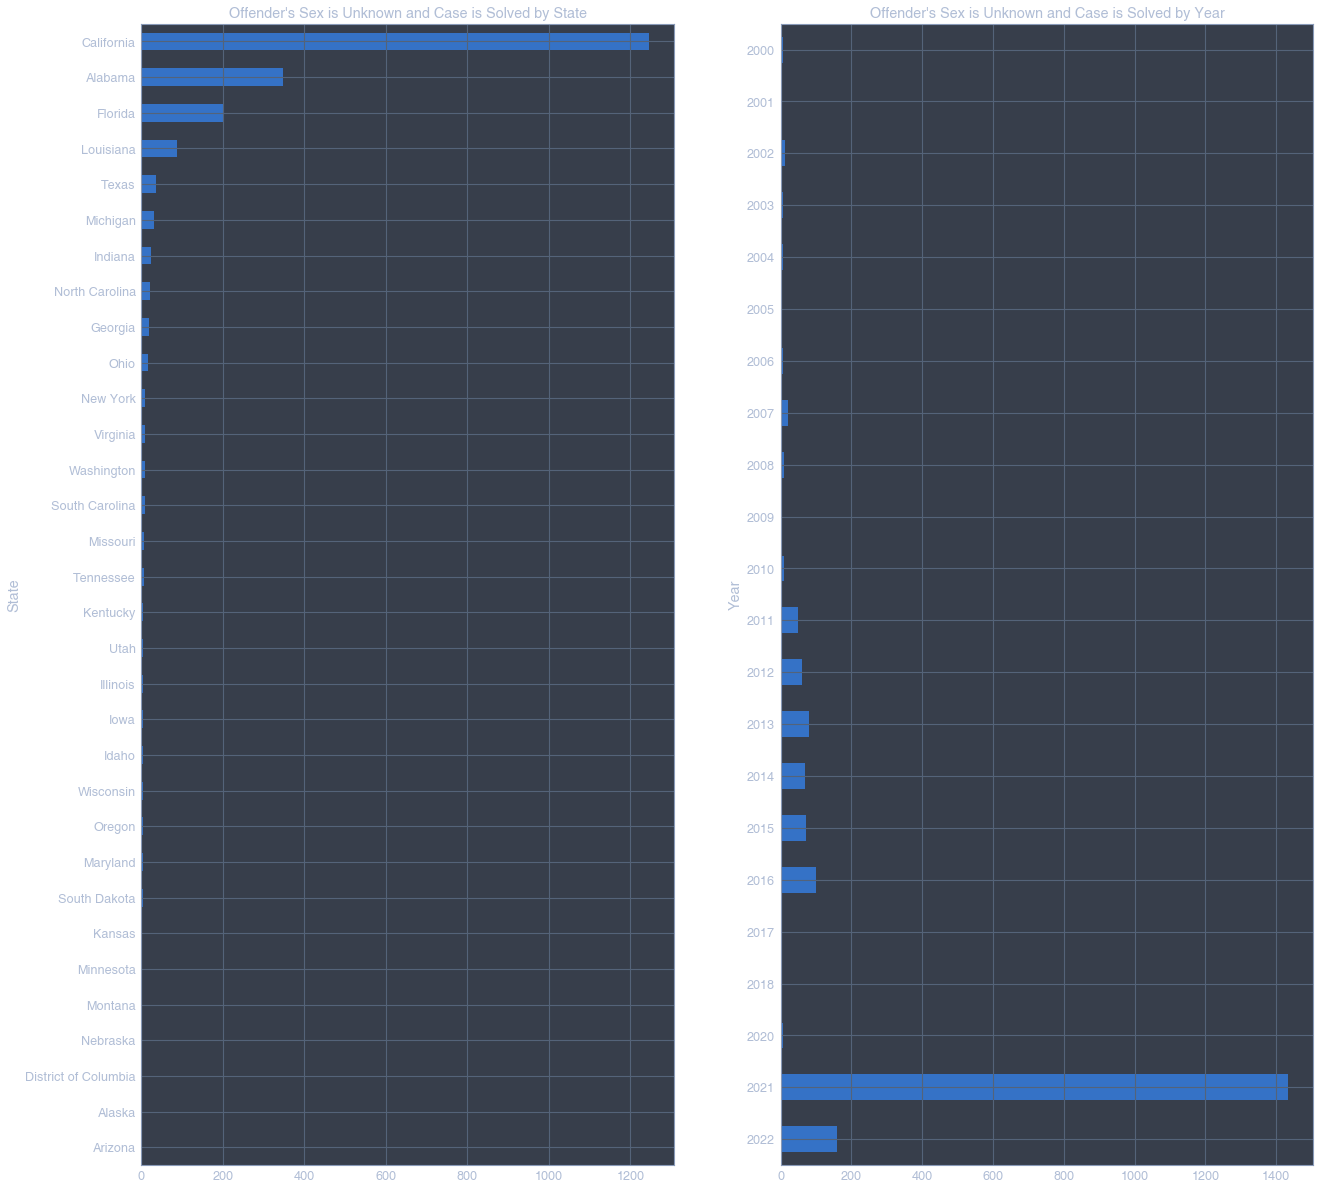

In [15]:
off_sex_unknw_solved_by_state = off_sex_unknw_solved.groupby('State')\
                                      .count()\
                                      .sort_values(by=['CNTYFIPS'],
                                                   ascending=True)['CNTYFIPS']

off_sex_unknw_solved_by_year = off_sex_unknw_solved.groupby('Year')\
                                     .count()['CNTYFIPS']

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

off_sex_unknw_solved_by_state.plot(kind='barh', ax=ax[0], color='b')
ax[0].set_title('Offender\'s Sex is Unknown and Case is Solved by State')

off_sex_unknw_solved_by_year.plot(kind='barh', ax=ax[1], color='b').invert_yaxis()
ax[1].set_title('Offender\'s Sex is Unknown and Case is Solved by Year')

Text(0.5, 1.0, "Offender's Sex is Unknown and Case is Solved by Circumstance")

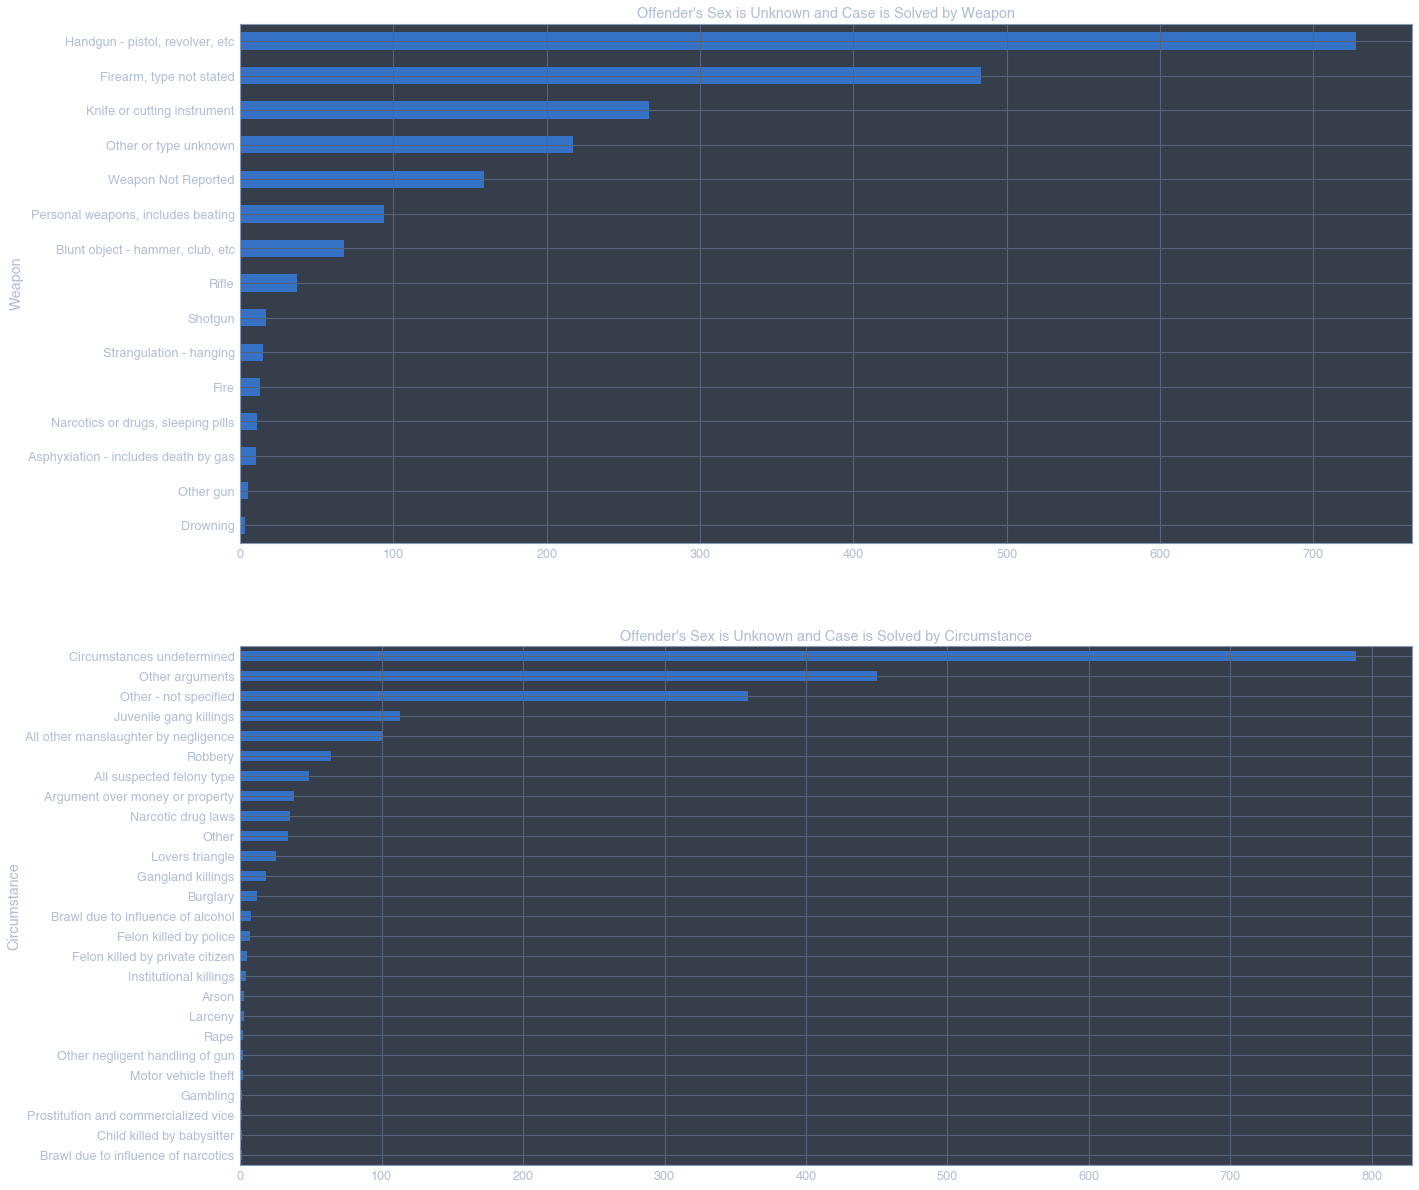

In [16]:
off_sex_unknw_solved_by_weapon = off_sex_unknw_solved.groupby('Weapon')\
                                                     .count()\
                                                     .sort_values(by=['CNTYFIPS'],
                                                                  ascending=True)['CNTYFIPS']

off_sex_unknw_solved_by_circumstance = off_sex_unknw_solved.groupby('Circumstance')\
                                                           .count()\
                                                           .sort_values(by=['CNTYFIPS'],
                                                                        ascending=True)['CNTYFIPS']

fig, ax = plt.subplots(2, 1, figsize=(21, 21))

off_sex_unknw_solved_by_weapon.plot(kind='barh', ax=ax[0], color='b')
ax[0].set_title('Offender\'s Sex is Unknown and Case is Solved by Weapon')

off_sex_unknw_solved_by_circumstance.plot(kind='barh', ax=ax[1], color='b')
ax[1].set_title('Offender\'s Sex is Unknown and Case is Solved by Circumstance')

### ...and Case is Unsolved

In [18]:
off_sex_unknw_unslv = off_sex_unknown[off_sex_unknown['Solved']=='No']

Text(0.5, 1.0, "Offender's Sex is Unknown and Case is Unsolved by Year")

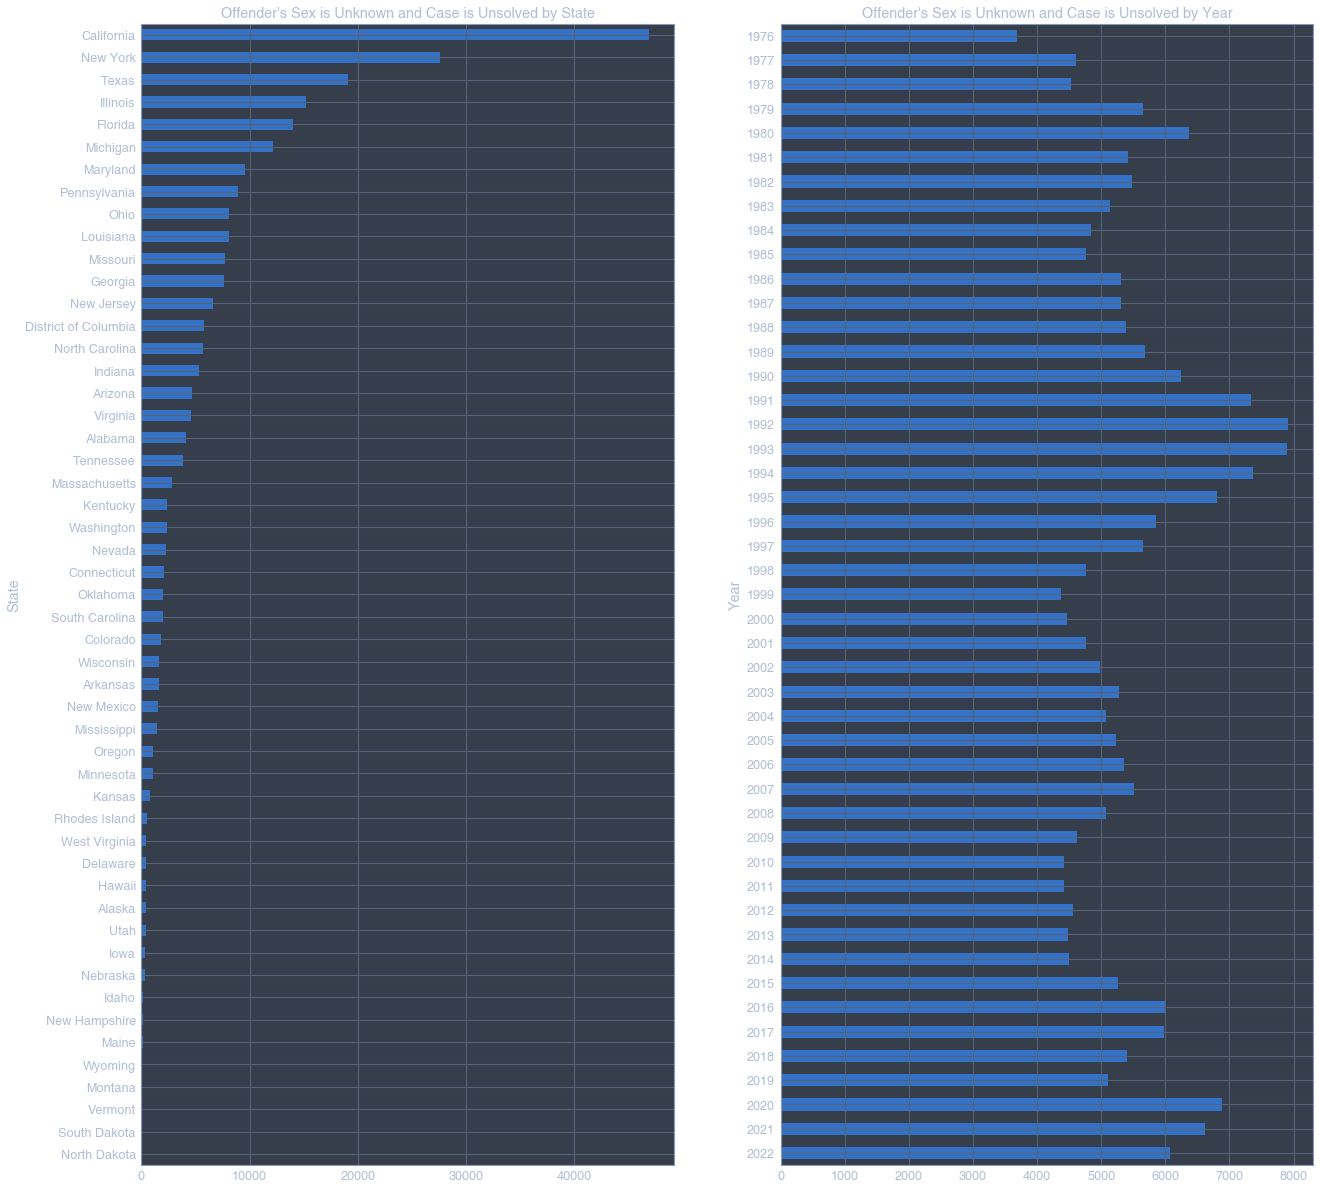

In [19]:
off_sex_unknw_unslv_by_state = off_sex_unknw_unslv.groupby('State')\
                                                  .count()\
                                                  .sort_values(by=['CNTYFIPS'],
                                                               ascending=True)['CNTYFIPS']

off_sex_unknw_unslv_by_year = off_sex_unknw_unslv.groupby('Year')\
                                                 .count()['CNTYFIPS']

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

off_sex_unknw_unslv_by_state.plot(kind='barh', ax=ax[0], color='b')
ax[0].set_title('Offender\'s Sex is Unknown and Case is Unsolved by State')

off_sex_unknw_unslv_by_year.plot(kind='barh', ax=ax[1], color='b').invert_yaxis()
ax[1].set_title('Offender\'s Sex is Unknown and Case is Unsolved by Year')

Text(0.5, 1.0, "Offender's Sex is Unknown and Case is Unsolved by Circumstance")

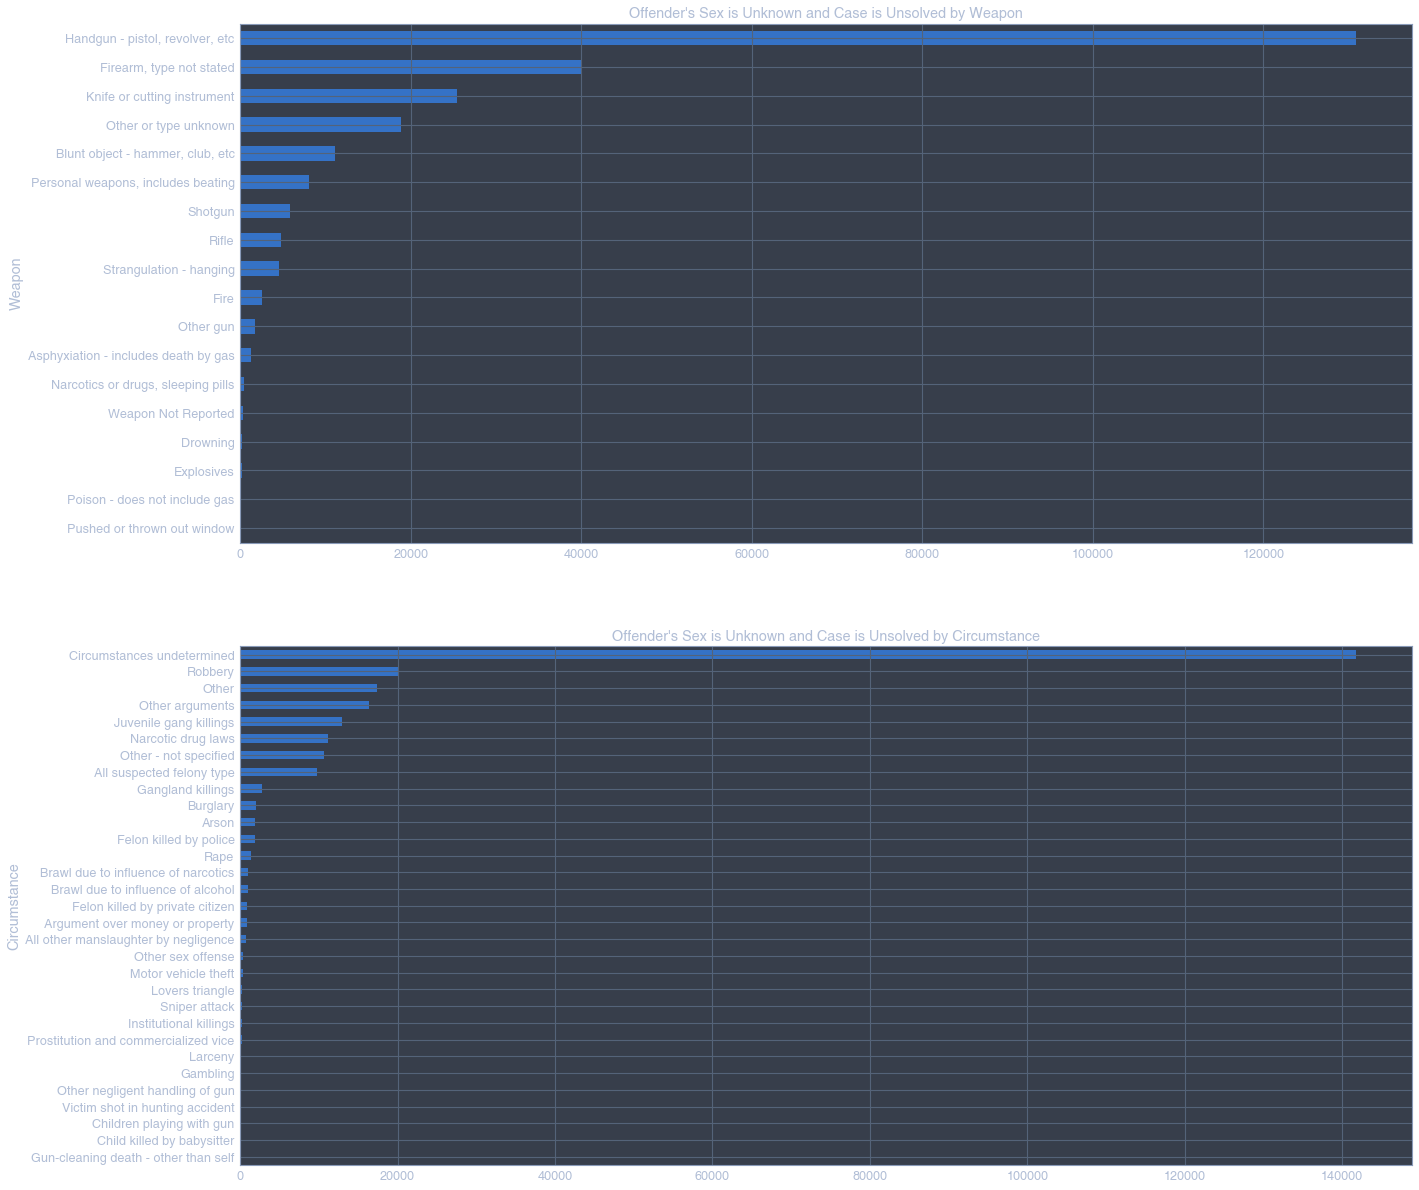

In [26]:
off_sex_unknw_unslv_by_weapon = off_sex_unknw_unslv.groupby('Weapon')\
                                                   .count()\
                                                   .sort_values(by=['CNTYFIPS'],
                                                                ascending=True)['CNTYFIPS']

off_sex_unknw_unslv_by_circumstance = off_sex_unknw_unslv.groupby('Circumstance')\
                                                         .count()\
                                                         .sort_values(by=['CNTYFIPS'],
                                                                      ascending=True)['CNTYFIPS']

fig, ax = plt.subplots(2, 1, figsize=(21, 21))

off_sex_unknw_unslv_by_weapon.plot(kind='barh', ax=ax[0], color='b')
ax[0].set_title('Offender\'s Sex is Unknown and Case is Unsolved by Weapon')

off_sex_unknw_unslv_by_circumstance.plot(kind='barh', ax=ax[1], color='b')
ax[1].set_title('Offender\'s Sex is Unknown and Case is Unsolved by Circumstance')

## Cases by Weapons

Text(0.5, 1.0, 'Weapons with Female/Male Victims Min_Max')

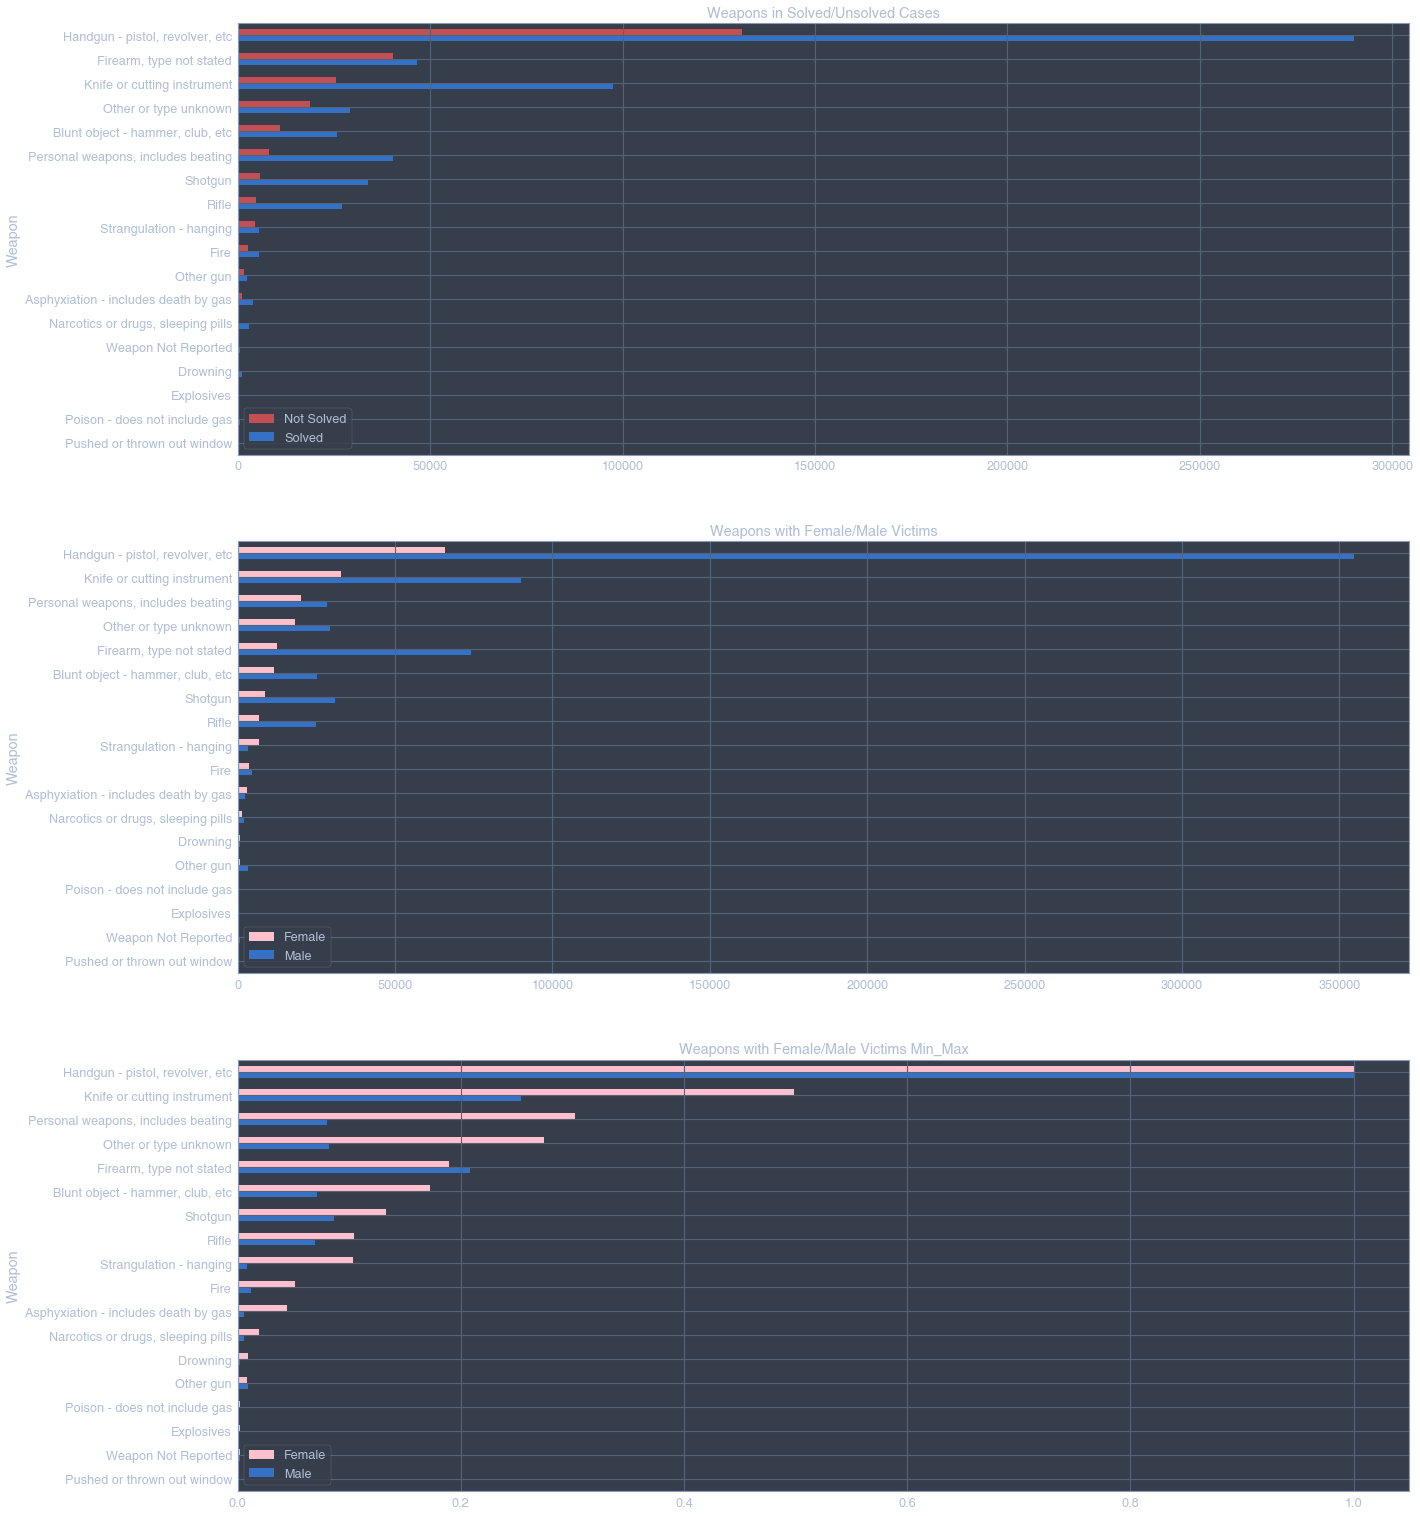

In [8]:
weapons_not_solved_cases = map_data[(map_data['Solved']=='No')].groupby('Weapon')\
                                                               .count()\
                                                               .sort_values(by=['CNTYFIPS'],
                                                                            ascending=False)['CNTYFIPS'].to_frame()

weapons_solved_cases = map_data[map_data['Solved']=='Yes'].groupby('Weapon')\
                                                          .count()['CNTYFIPS']

weapons_cases = weapons_not_solved_cases.merge(weapons_solved_cases, on='Weapon')

weapons_cases.rename(columns={'CNTYFIPS_x': 'Not Solved',
                              'CNTYFIPS_y': 'Solved'}, inplace=True)

weapons_female_cases = map_data[(map_data['VicSex']=='Female')].groupby('Weapon')\
                                                               .count()\
                                                               .sort_values(by=['CNTYFIPS'],
                                                                         ascending=False)['CNTYFIPS'].to_frame()

weapons_male_cases = map_data[map_data['VicSex']=='Male'].groupby('Weapon')\
                                                         .count()['CNTYFIPS']

weapons_cases_by_sex = weapons_female_cases.merge(weapons_male_cases, on='Weapon')

weapons_cases_by_sex.rename(columns={'CNTYFIPS_x': 'Female',
                                     'CNTYFIPS_y': 'Male'}, inplace=True)

weapon_by_victims_sex_min_max = minmax_scaling(weapons_cases_by_sex, columns=['Female', 'Male'])

fig, ax = plt.subplots(3, 1, figsize=(21, 27))
weapons_cases.plot(kind='barh', color=colors['Solved'], ax=ax[0]).invert_yaxis()
weapons_cases_by_sex.plot(kind='barh', color=colors['Sex'], ax=ax[1]).invert_yaxis()
weapon_by_victims_sex_min_max.plot(kind='barh', color=colors['Sex'], ax=ax[2]).invert_yaxis()
ax[0].set_title('Weapons in Solved/Unsolved Cases')
ax[1].set_title('Weapons with Female/Male Victims')
ax[2].set_title('Weapons with Female/Male Victims Min_Max')

## Cases by Victim's Sex

In [6]:
map_data.groupby('VicSex').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
VicSex,,,,,,,,,,,,,,,,,,,,,
Female,194189,194189,194189,194189,194189,194189,194189,194189,194189,194189,...,194189,194189,194189,194189,194189,975,194189,194189,187376,194189
Male,675173,675173,675173,675173,675173,675173,675173,675173,675173,675173,...,675173,675173,675173,675173,675173,32760,675173,675173,651933,675173
Unknown,1574,1574,1574,1574,1574,1574,1574,1574,1574,1574,...,1574,1574,1574,1574,1574,31,1574,1574,1462,1574


<AxesSubplot:xlabel='VicSex'>

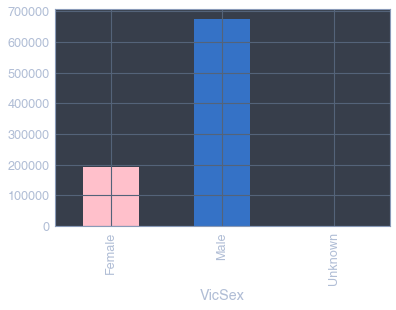

In [16]:
map_data.groupby('VicSex').count()['CNTYFIPS'].plot(kind='bar', color=colors['Sex'])

In [17]:
cases_by_sex_year = map_data.groupby(['Year', 'VicSex']).count()['CNTYFIPS'].to_frame()
cases_by_sex_year = pd.pivot_table(cases_by_sex_year, index='Year', columns='VicSex', values='CNTYFIPS')
cases_by_sex_year.drop('Unknown', axis=1, inplace=True)

cases_by_sex_year['Female'] = cases_by_sex_year['Female'].astype(int)
cases_by_sex_year['Male'] = cases_by_sex_year['Male'].astype(int)


In [18]:
cases_by_sex_state = map_data.groupby(['State', 'VicSex']).count()['CNTYFIPS'].to_frame()
cases_by_sex_state = pd.pivot_table(cases_by_sex_state, index='State', columns='VicSex', values='CNTYFIPS')
cases_by_sex_state.drop('Unknown', axis=1, inplace=True)

cases_by_sex_state['Female'] = cases_by_sex_state['Female'].astype(int)
cases_by_sex_state['Male'] = cases_by_sex_state['Male'].astype(int)

cases_by_sex_state.sort_values(by=['Female'], ascending=False, inplace=True)

Text(0.5, 1.0, 'Cases by Sex and Year')

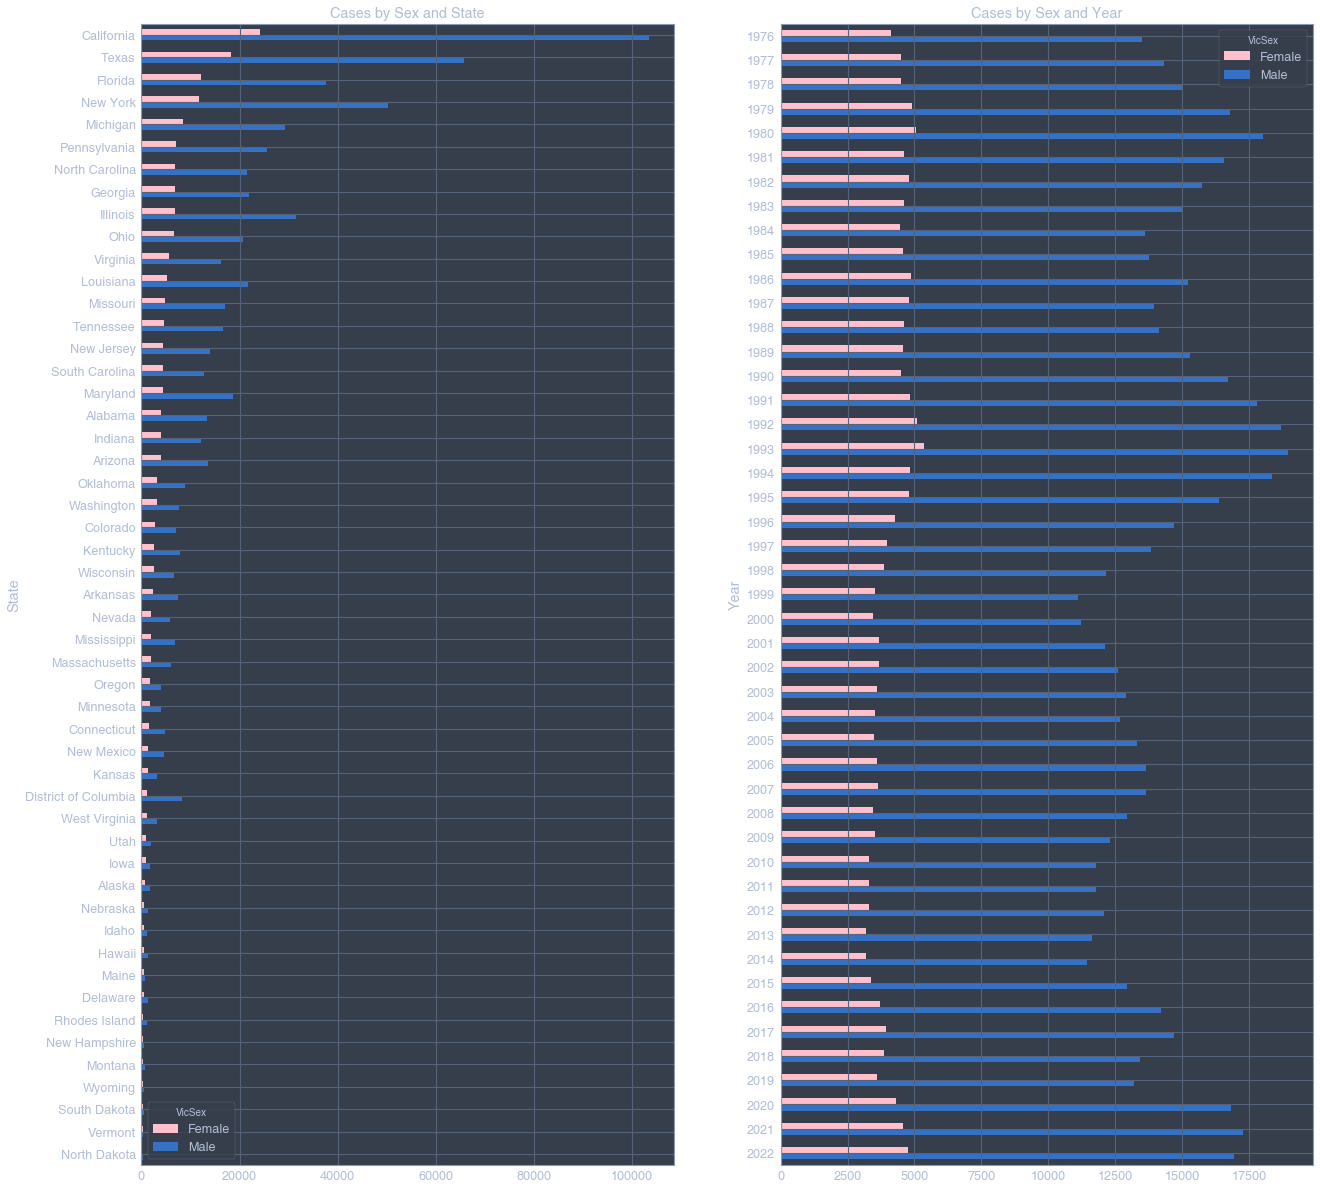

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

cases_by_sex_state.plot(kind='barh', ax=ax[0], color=colors['Sex']).invert_yaxis()
cases_by_sex_year.plot(kind='barh', ax=ax[1], color=colors['Sex']).invert_yaxis()
ax[0].set_title('Cases by Sex and State')
ax[1].set_title('Cases by Sex and Year')

In [29]:
not_solved_cases_by_sex_year = map_data[map_data['Solved']=='No'].groupby(['Year', 'VicSex']).count()['CNTYFIPS'].to_frame()
not_solved_cases_by_sex_year = pd.pivot_table(not_solved_cases_by_sex_year, index='Year', columns='VicSex', values='CNTYFIPS')
not_solved_cases_by_sex_year.drop('Unknown', axis=1, inplace=True)

not_solved_cases_by_sex_year['Female'] = not_solved_cases_by_sex_year['Female'].astype(int)
not_solved_cases_by_sex_year['Male'] = not_solved_cases_by_sex_year['Male'].astype(int)

solved_cases_by_sex_year = map_data[map_data['Solved']=='Yes'].groupby(['Year', 'VicSex']).count()['CNTYFIPS'].to_frame()
solved_cases_by_sex_year = pd.pivot_table(solved_cases_by_sex_year, index='Year', columns='VicSex', values='CNTYFIPS')
solved_cases_by_sex_year.drop('Unknown', axis=1, inplace=True)

solved_cases_by_sex_year['Female'] = solved_cases_by_sex_year['Female'].astype(int)
solved_cases_by_sex_year['Male'] = solved_cases_by_sex_year['Male'].astype(int)

Text(0.5, 1.0, 'Solved Cases by victims sex')

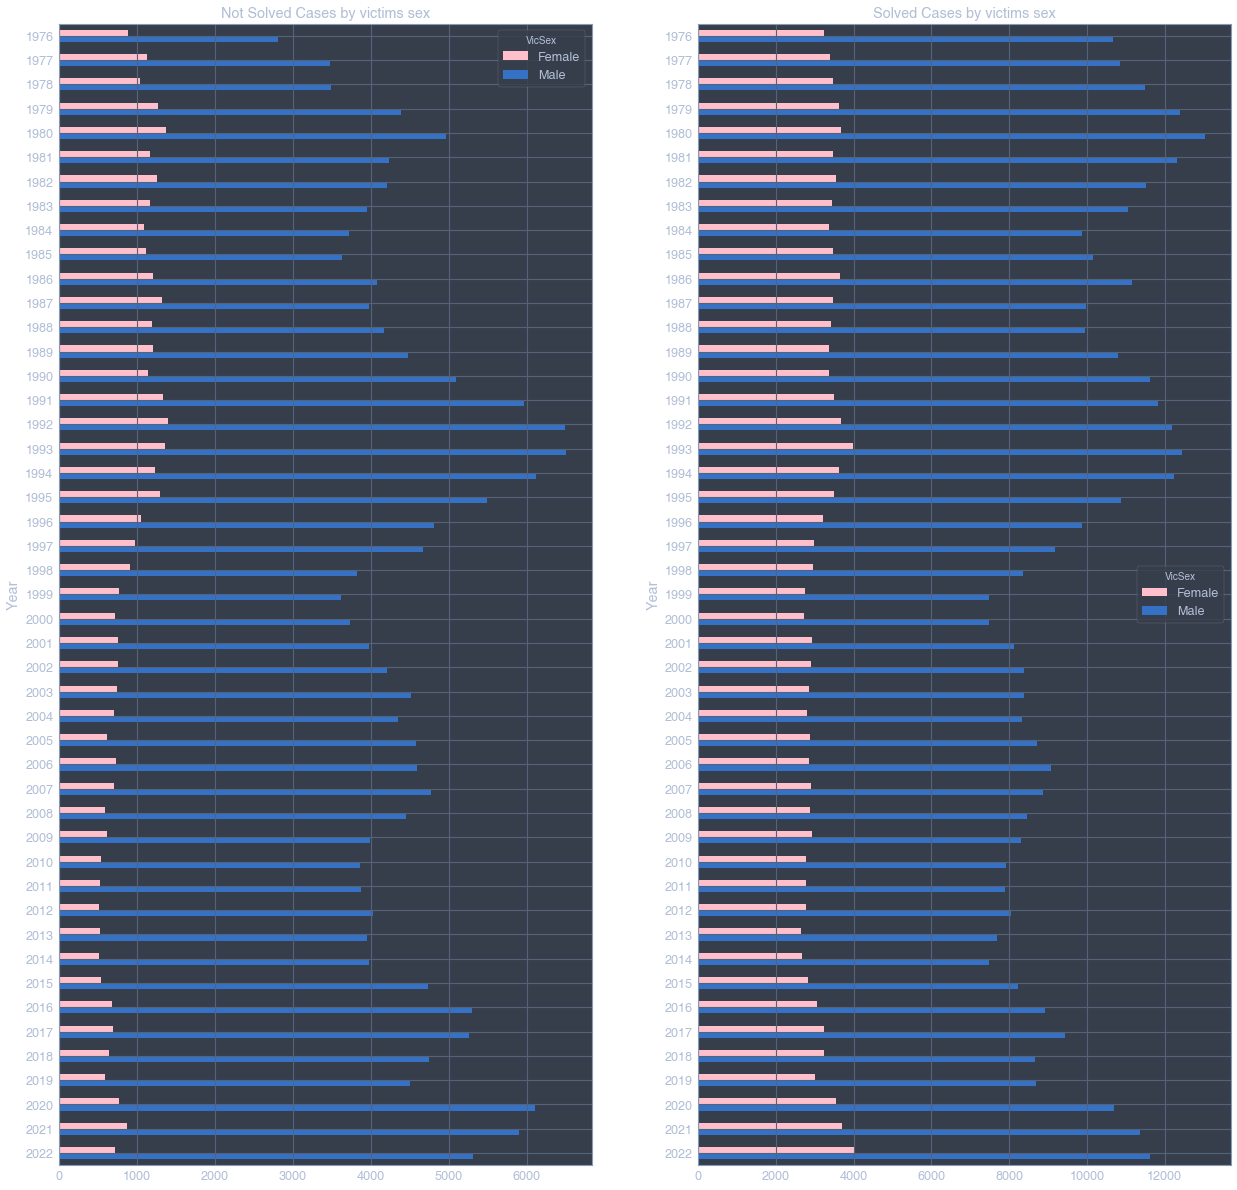

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))
colors = ['pink', 'b']
not_solved_cases_by_sex_year.plot(kind='barh', color=colors['Sex'], ax=ax[0]).invert_yaxis()
solved_cases_by_sex_year.plot(kind='barh', color=colors['Sex'], ax=ax[1]).invert_yaxis()
ax[0].set_title('Not Solved Cases by victims sex')
ax[1].set_title('Solved Cases by victims sex')

Text(0.5, 1.0, 'Cases w/ Male offender by victims sex')

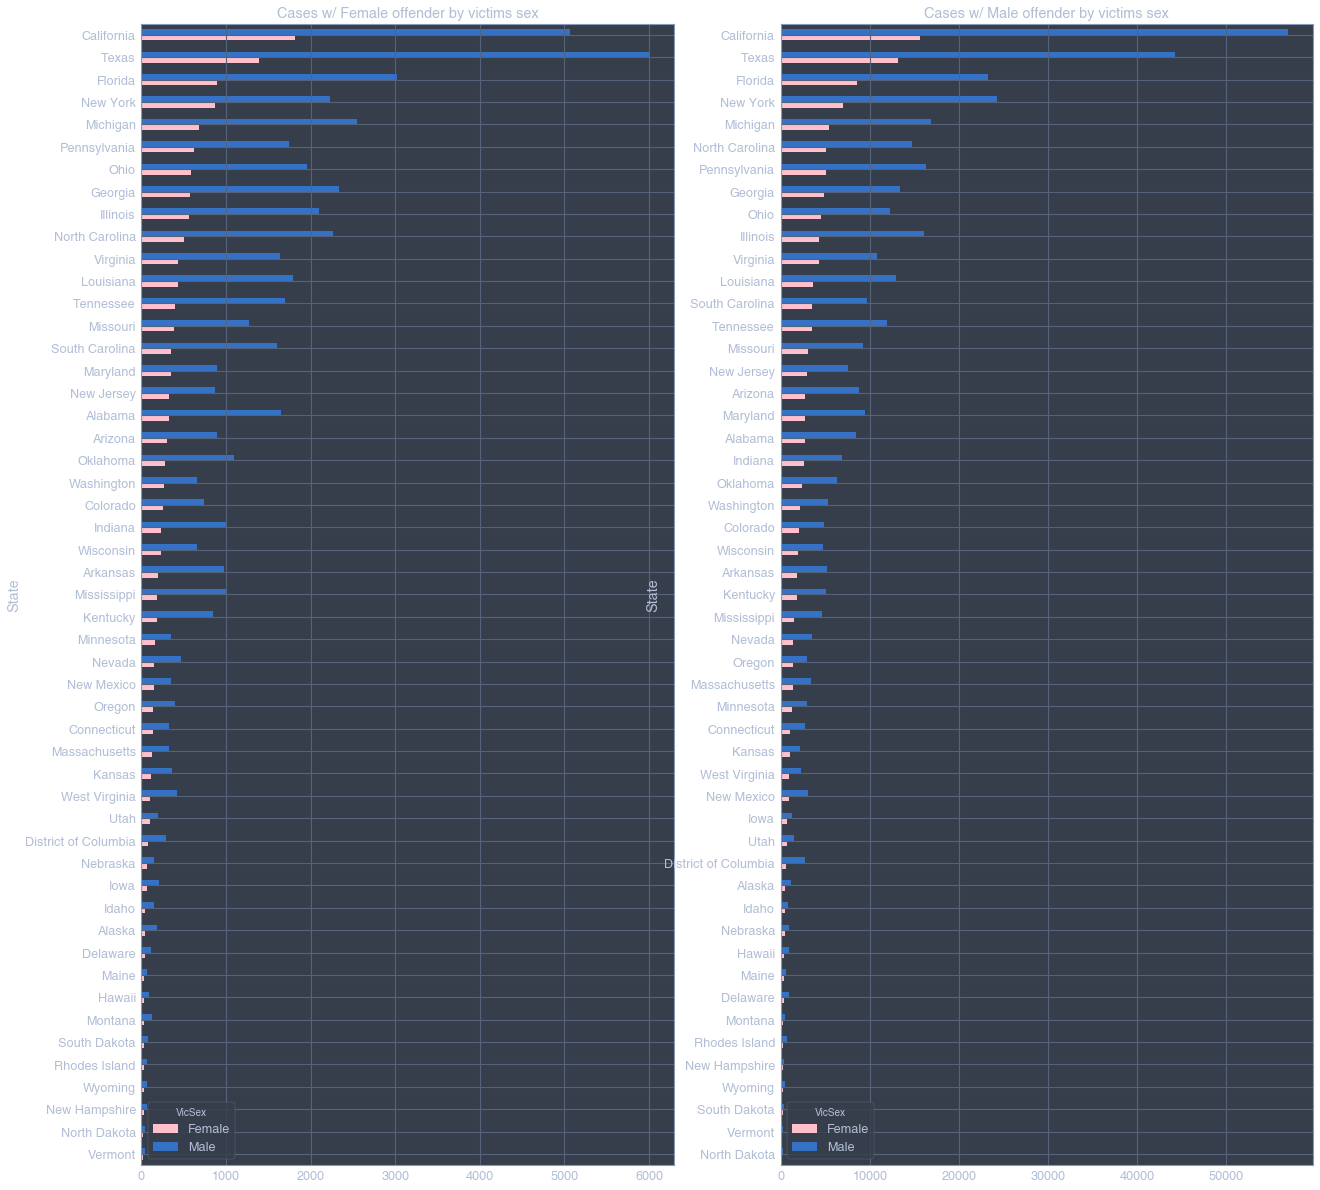

In [19]:
female_offender = map_data[(map_data['OffSex']=='Female') & (map_data['VicSex'].isin(['Female', 'Male']))]
female_offender = female_offender.groupby(['State', 'VicSex']).count()['CNTYFIPS'].to_frame()
female_offender = pd.pivot_table(female_offender, index='State', columns='VicSex', values='CNTYFIPS')
female_offender.sort_values(by=['Female'], ascending=True, inplace=True)

male_offender = map_data[(map_data['OffSex']=='Male') & (map_data['VicSex'].isin(['Female', 'Male']))]
male_offender = male_offender.groupby(['State', 'VicSex']).count()['CNTYFIPS'].to_frame()
male_offender = pd.pivot_table(male_offender, index='State', columns='VicSex', values='CNTYFIPS')
male_offender.sort_values(by=['Female'], ascending=True, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(21, 21))
female_offender.plot(kind='barh', color=colors['Sex'], ax=ax[0])
male_offender.plot(kind='barh', color=colors['Sex'], ax=ax[1])
ax[0].set_title('Cases w/ Female offender by victims sex')
ax[1].set_title('Cases w/ Male offender by victims sex')

Text(0.5, 1.0, 'Cases w/ Male offender by victims sex')

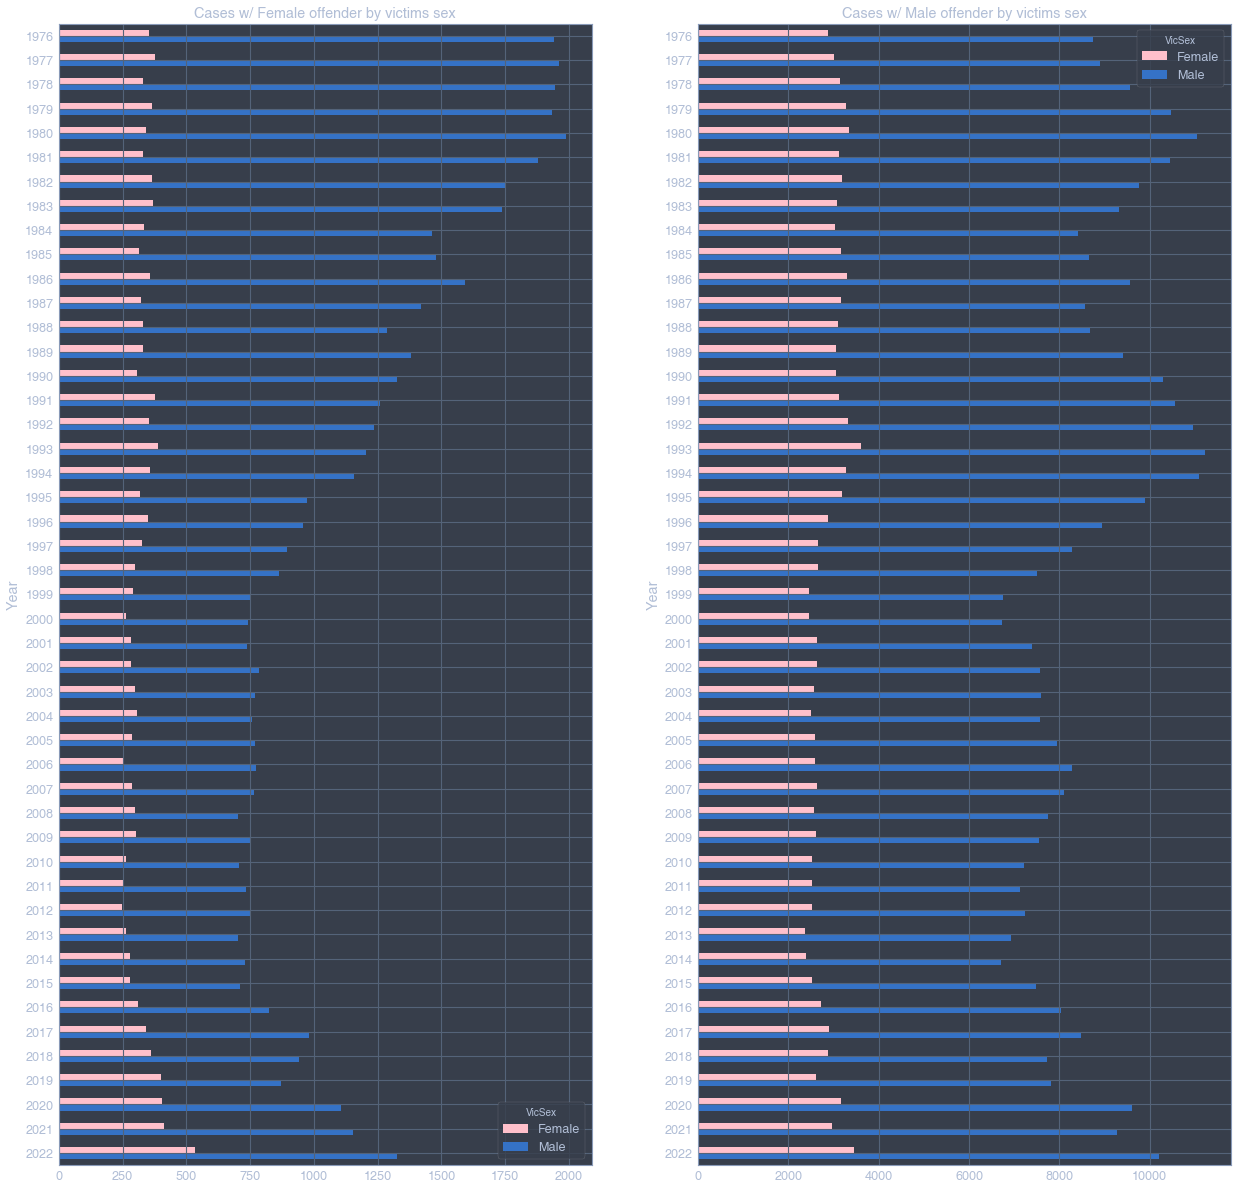

In [28]:
female_offender = map_data[(map_data['OffSex']=='Female') & (map_data['VicSex'].isin(['Female', 'Male']))]
female_offender = female_offender.groupby(['Year', 'VicSex']).count()['CNTYFIPS'].to_frame()
female_offender = pd.pivot_table(female_offender, index='Year', columns='VicSex', values='CNTYFIPS')

male_offender = map_data[(map_data['OffSex']=='Male') & (map_data['VicSex'].isin(['Female', 'Male']))]
male_offender = male_offender.groupby(['Year', 'VicSex']).count()['CNTYFIPS'].to_frame()
male_offender = pd.pivot_table(male_offender, index='Year', columns='VicSex', values='CNTYFIPS')

fig, ax = plt.subplots(1, 2, figsize=(21, 21))
female_offender.plot(kind='barh', color=colors['Sex'], ax=ax[0]).invert_yaxis()
male_offender.plot(kind='barh', color=colors['Sex'], ax=ax[1]).invert_yaxis()
ax[0].set_title('Cases w/ Female offender by victims sex')
ax[1].set_title('Cases w/ Male offender by victims sex')

In [40]:
female_off = map_data[(map_data['OffSex']=='Female')
                      & (map_data['VicSex'].isin(['Female', 'Male']))].groupby('VicSex')\
                                                                      .count()['CNTYFIPS']

male_off = map_data[(map_data['OffSex']=='Male')
                    & (map_data['VicSex'].isin(['Female', 'Male']))].groupby('VicSex')\
                                                                    .count()['CNTYFIPS']

female_victims = female_off.loc['Female'] + male_off.loc['Female']
male_victims = female_off.loc['Male'] + male_off.loc['Male']
female_off_female_vic = round(female_off.loc['Female']*100/female_victims, 2)
female_off_male_vic = round(female_off.loc['Male']*100/male_victims, 2)

print('Female victims:')
print(f"Female killed: {female_off_female_vic}% of all female victims")
print(f"Male killed: {round(100 - female_off_female_vic, 2)}% of all female victims")
print('-----------------------------------------')
print('Male victims:')
print(f"Female killed: {female_off_male_vic}% of all male victims")
print(f"Male killed: {100 - female_off_male_vic}% of all male victims")
print('-----------------------------------------')
print('female/male victims rate:')
print(f"Female Offender: {round(female_off.loc['Female']/female_off.loc['Male'], 2)}")
print(f"Male Offender: {round(male_off.loc['Female']/male_off.loc['Male'], 2)}")
print('-----------------------------------------')

Female victims:
Female killed: 10.21% of all female victims
Male killed: 89.79% of all female victims
-----------------------------------------
Male victims:
Female killed: 11.6% of all male victims
Male killed: 88.4% of all male victims
-----------------------------------------
female/male victims rate:
Female Offender: 0.29
Male Offender: 0.33
-----------------------------------------


## Age

Text(0.5, 1.0, 'Female/Male Cases by victims sex')

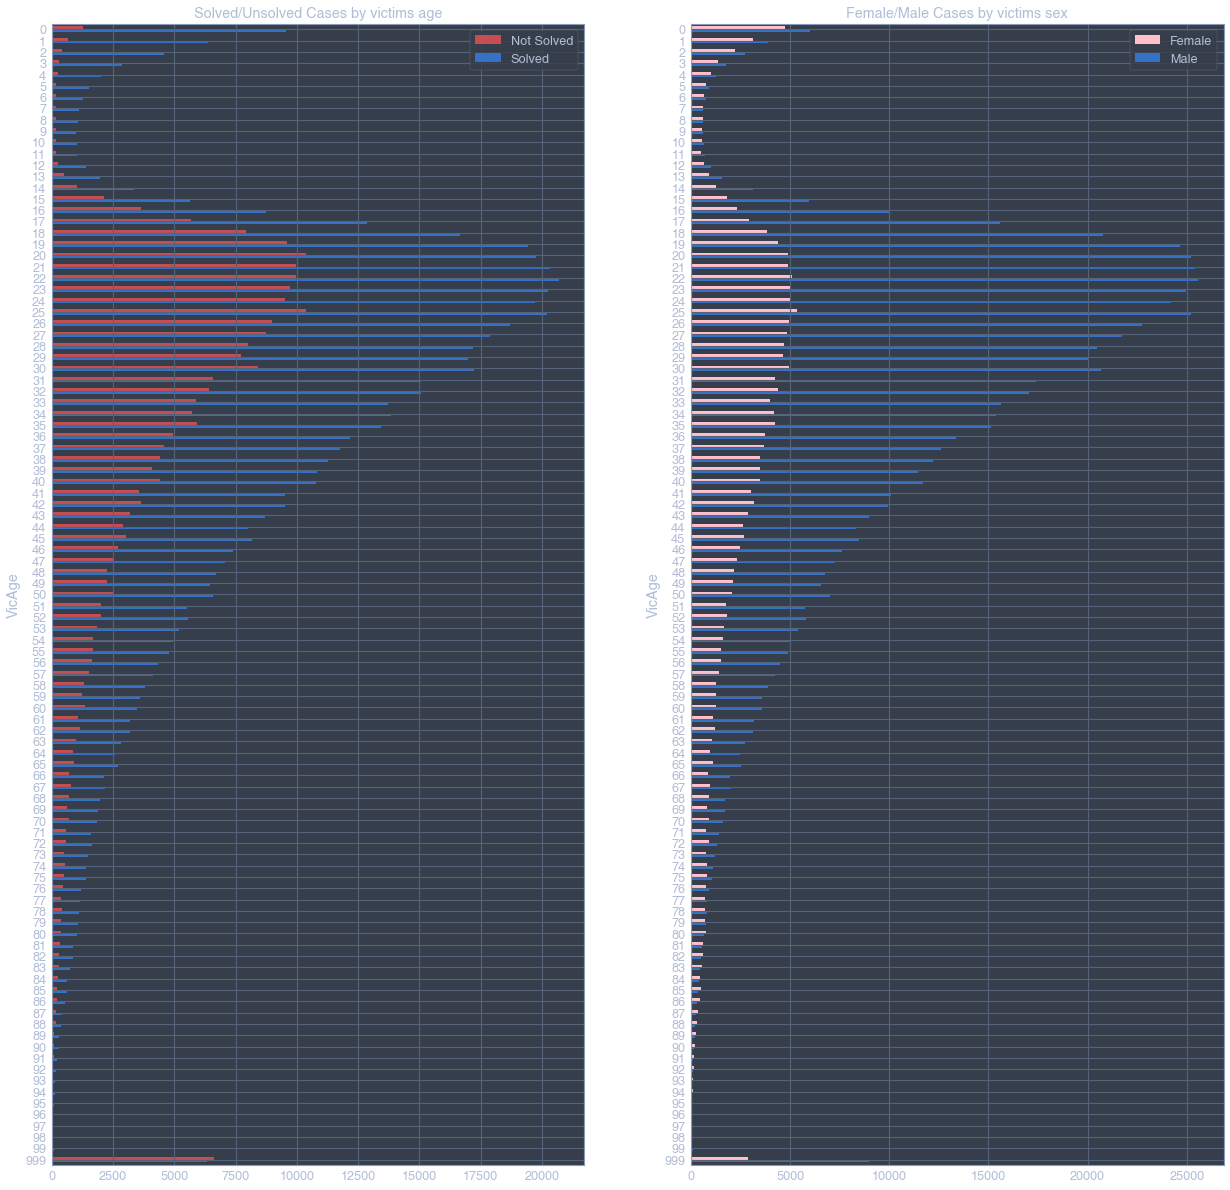

In [11]:
not_solved_cases_by_age = map_data[map_data['Solved']=='No'].groupby('VicAge')\
                                                            .count()['CNTYFIPS'].to_frame()

solved_cases_by_age = map_data[map_data['Solved']=='Yes'].groupby('VicAge')\
                                                         .count()['CNTYFIPS']

cases_by_age = not_solved_cases_by_age.merge(solved_cases_by_age, on='VicAge')

cases_by_age.rename(columns={'CNTYFIPS_x': 'Not Solved',
                             'CNTYFIPS_y': 'Solved'}, inplace=True)


cases_by_age_female = map_data[map_data['VicSex']=='Female'].groupby('VicAge')\
                                                            .count()['CNTYFIPS'].to_frame()

cases_by_age_male = map_data[map_data['VicSex']=='Male'].groupby('VicAge')\
                                                        .count()['CNTYFIPS']

cases_by_age_sex = cases_by_age_female.merge(cases_by_age_male, on='VicAge')

cases_by_age_sex.rename(columns={'CNTYFIPS_x': 'Female',
                                 'CNTYFIPS_y': 'Male'}, inplace=True)


fig, ax = plt.subplots(1, 2, figsize=(21, 21))

cases_by_age.plot(kind='barh', color=colors['Solved'], ax=ax[0]).invert_yaxis()
cases_by_age_sex.plot(kind='barh', color=colors['Sex'], ax=ax[1]).invert_yaxis()

ax[0].set_title('Solved/Unsolved Cases by victims age')
ax[1].set_title('Female/Male Cases by victims sex')

## Race

In [6]:
races = map_data.groupby(['OffRace', 'VicRace']).count()['CNTYFIPS'].to_frame()
races = pd.pivot_table(races, index='OffRace', columns='VicRace', values='CNTYFIPS')

races

VicRace,American Indian or Alaskan Native,Asian,Black,Native Hawaiian or Pacific Islander,Unknown,White
OffRace,,,,,,
American Indian or Alaskan Native,3112,47,306,4,66,1910
Asian,46,4694,753,10,106,1957
Black,624,1667,246283,27,1595,45516
Native Hawaiian or Pacific Islander,3,13,35,54,11,65
Unknown,1485,3728,144159,57,6403,111462
White,1707,2247,24169,59,2205,264351


Text(0.5, 1.0, 'Victims Race and Offenders Race')

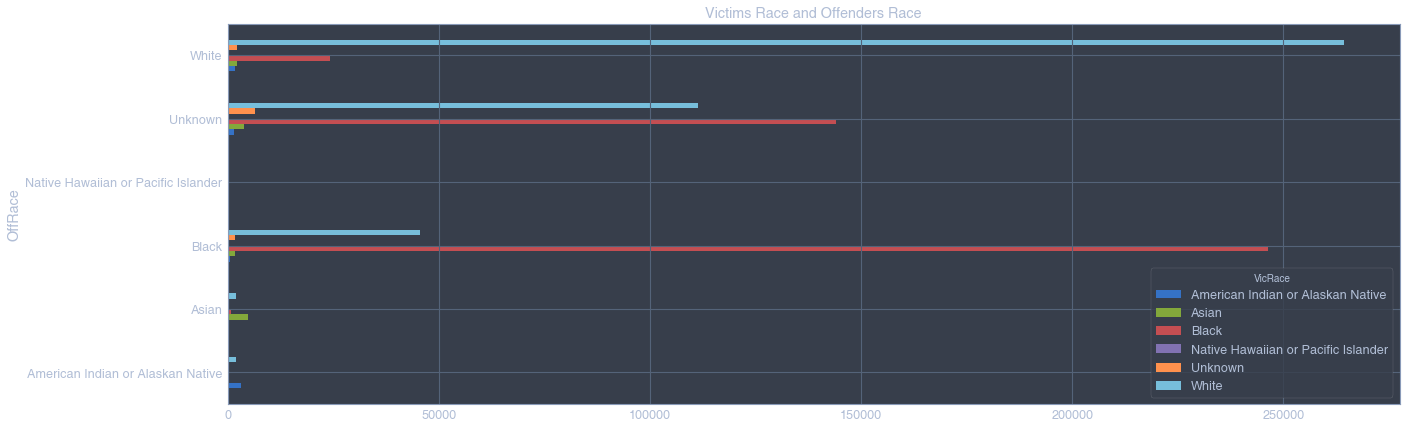

In [7]:
fig, ax = plt.subplots(figsize=(21, 7))
races.plot(kind='barh', ax=ax)
ax.set_title('Victims Race and Offenders Race')

---

In [4]:
MEAN_NUM_OF_MURDERS_BY_YEAR = map_data.groupby(['State', 'Year']).count()['CNTYFIPS'].groupby('State').mean()

def show_mean_murders_in(state:str)->None:
    cases = map_data.groupby(['State', 'Year']).count()['CNTYFIPS'][state].to_frame()
    cases.rename(columns={'CNTYFIPS': 'Murders'}, inplace=True)
    cases['Mean'] = MEAN_NUM_OF_MURDERS_BY_YEAR[state]
    
    fig, ax = plt.subplots(figsize=(21, 7))
    cases.plot(kind='bar', color='b', ax=ax)

    ax.set_title(state)
    

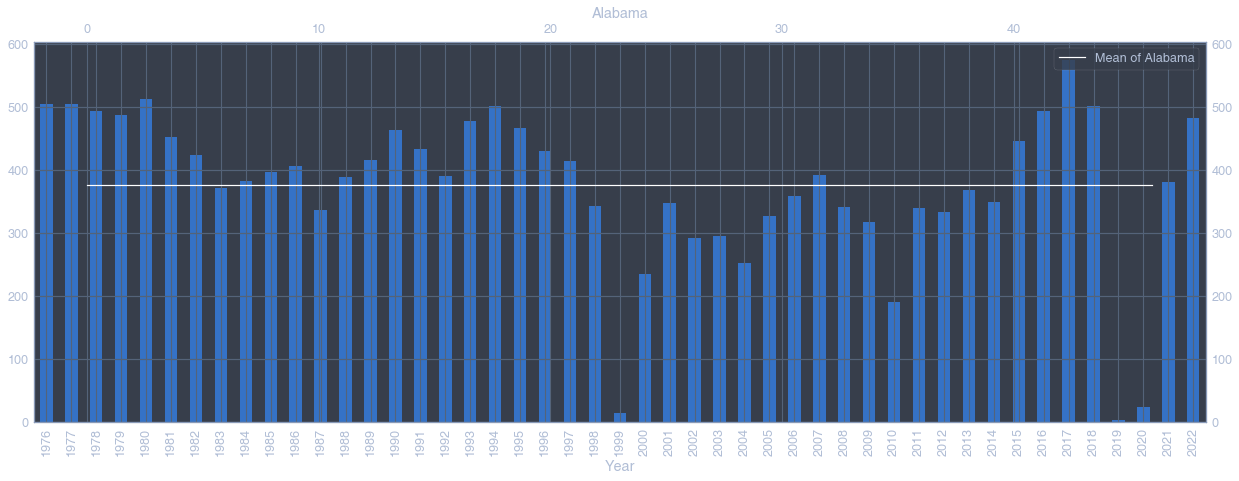

In [68]:
state='Alabama'
cases = map_data.groupby(['State', 'Year']).count()['CNTYFIPS'][state].to_frame()
cases.rename(columns={'CNTYFIPS': 'Murders'}, inplace=True)
cases['Mean'] = MEAN_NUM_OF_MURDERS_BY_YEAR[state]

fig, ax = plt.subplots(figsize=(21, 7))
ax2 = ax.twiny().twinx()
cases['Murders'].plot(kind='bar', color='b', ax=ax, label=f'Murders in {state}')
ax2.plot(ax.get_xticks(), cases['Mean'], color='w', label=f'Mean of {state}')

ax2.set_xlim(ax.get_xlim())
ax2.set_ylim(ax.get_ylim())
# ax2.set_xticklabels(ax.get_xticklabels())
# https://stackoverflow.com/questions/45440474/matplotlib-twinx-wrong-values-on-second-axis
ax.set_title(state)
plt.legend()

<AxesSubplot:ylabel='State'>

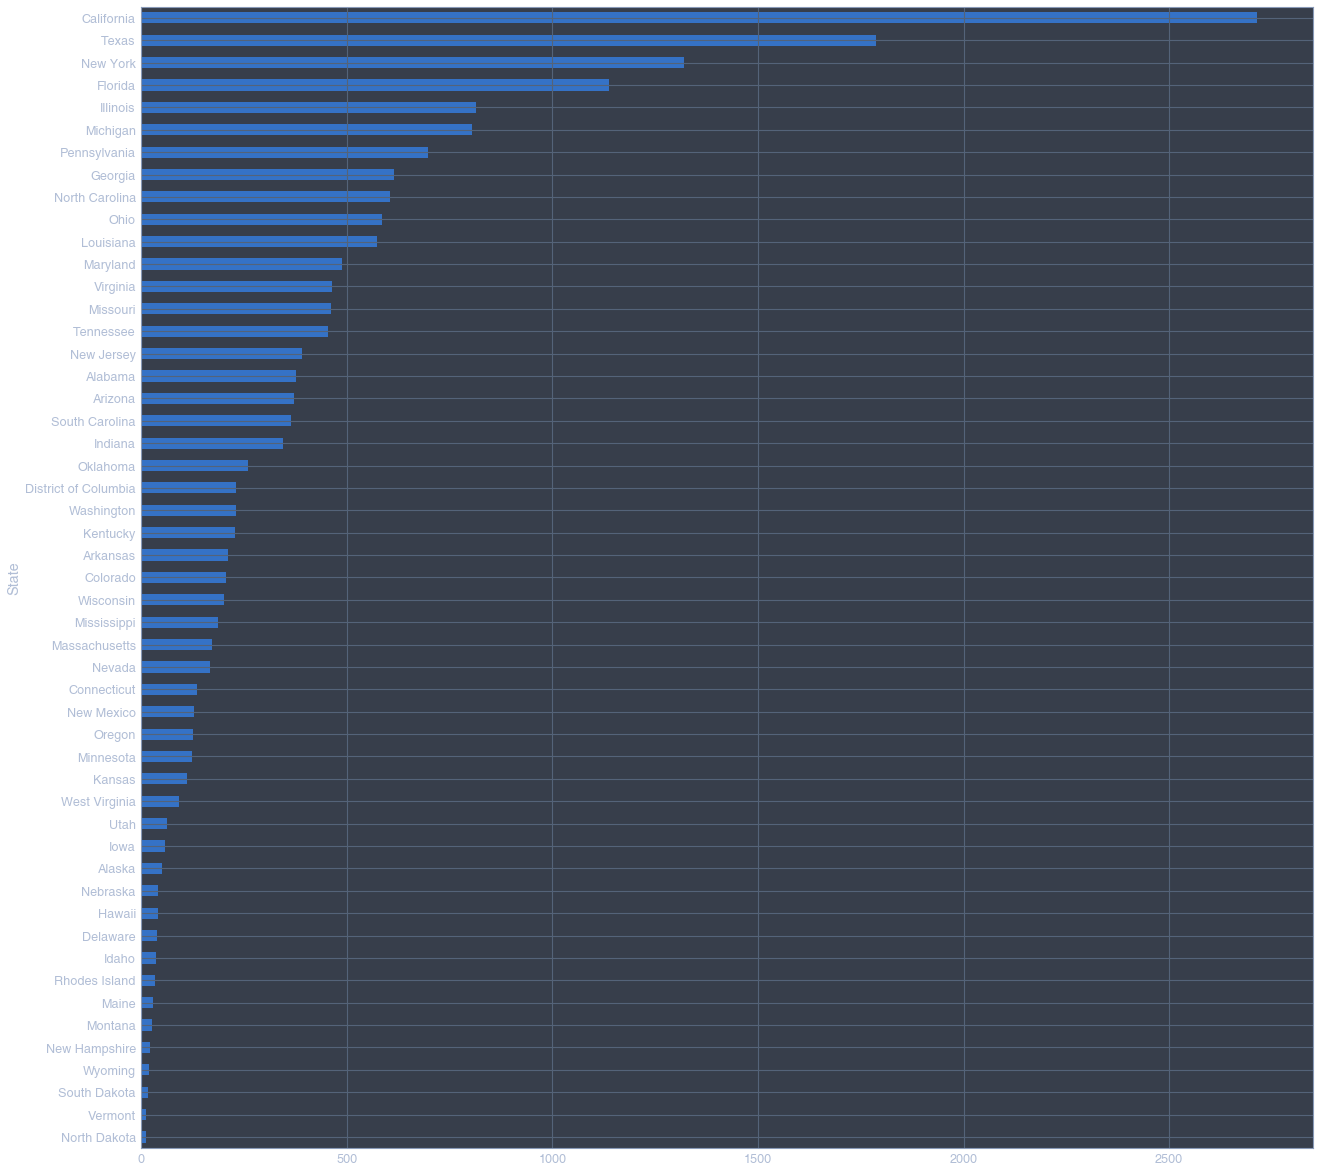

In [71]:
fig, ax = plt.subplots(figsize=(21, 21))
MEAN_NUM_OF_MURDERS_BY_YEAR.sort_values(ascending=True).plot(kind='barh', ax=ax)

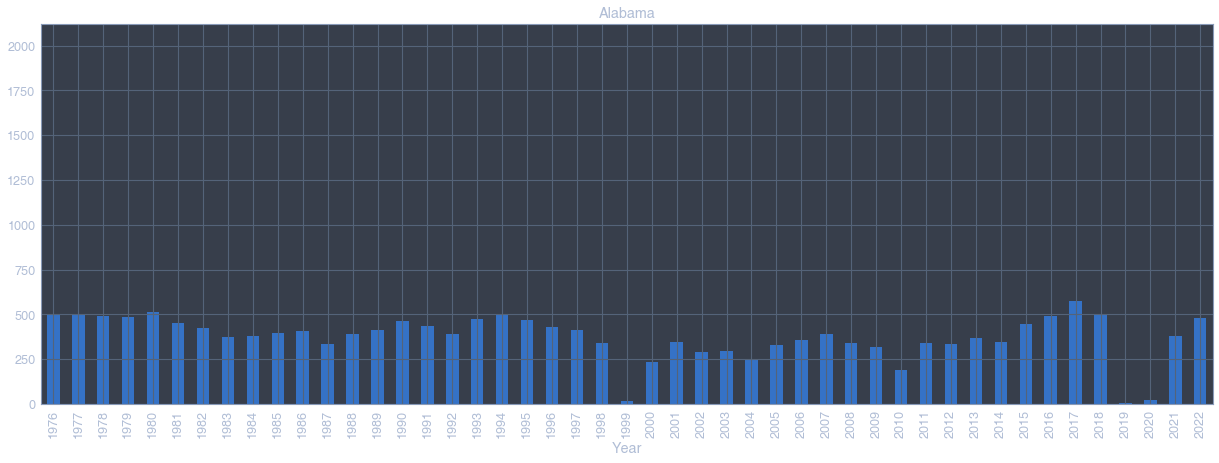

In [5]:
show_mean_murders_in('Alabama')

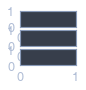

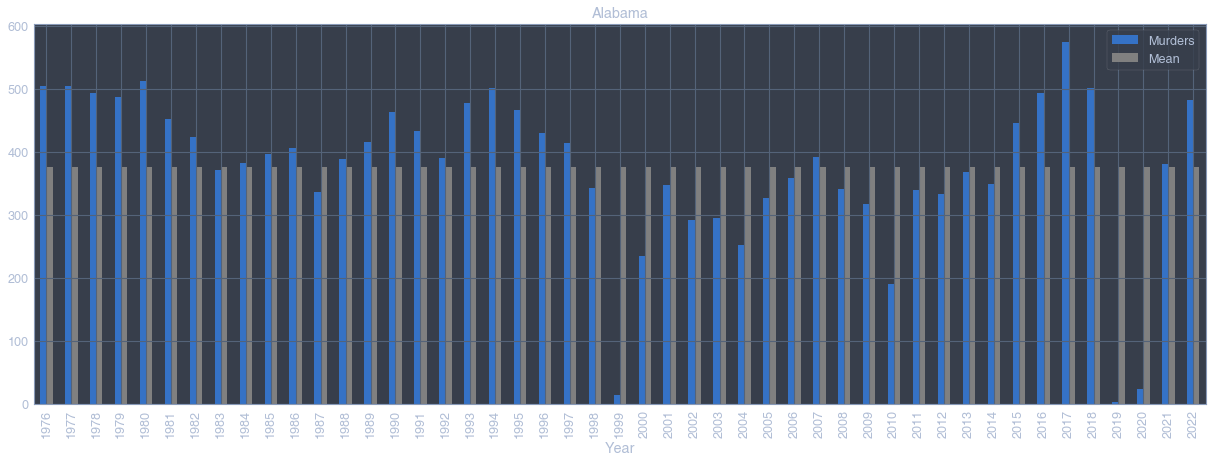

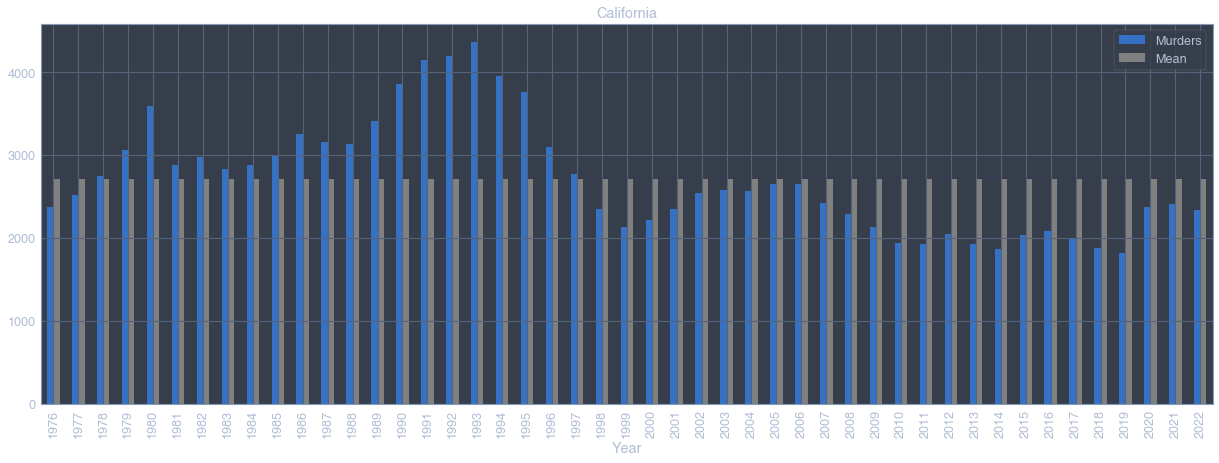

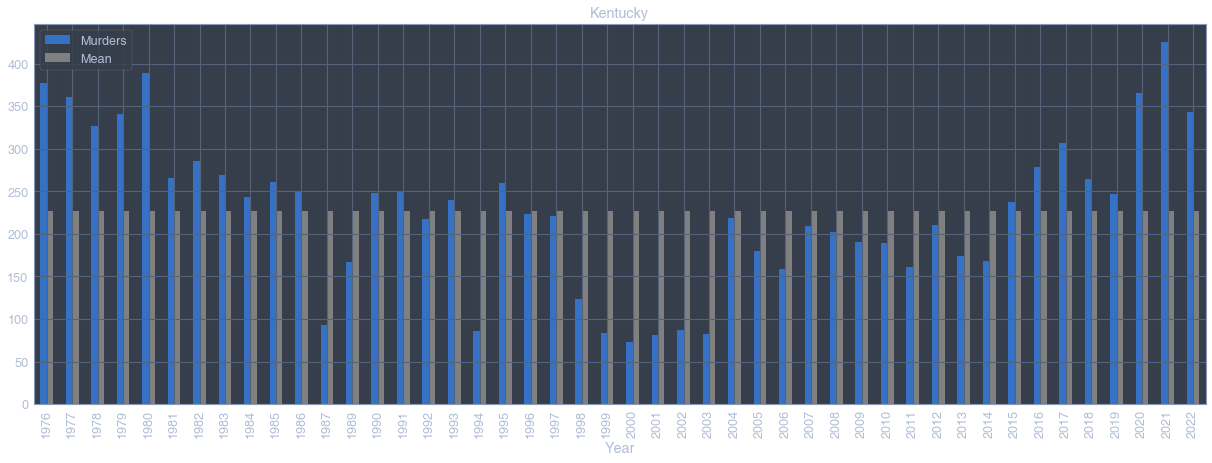

In [64]:
fig, ax = plt.subplots(3, 1, figsize=(1, 1))
show_mean_murders_in('Alabama')
show_mean_murders_in('California')
show_mean_murders_in('Kentucky')

## Female, Murder and non-negligent manslaughter, Solved and No Solved cases 

In [3]:
not_solved_cases_f = map_data[(map_data['Solved']=='No')
                              & (map_data['VicSex']=='Female')
                              & (map_data['Homicide']=='Murder and non-negligent manslaughter')]

solved_cases_f = map_data[(map_data['Solved']=='Yes')
                          & (map_data['VicSex']=='Female')
                          & (map_data['Homicide']=='Murder and non-negligent manslaughter')]

In [4]:
not_solved_f_by_state = not_solved_cases_f.groupby('State').count()['CNTYFIPS']
not_solved_f_by_year = not_solved_cases_f.groupby('Year').count()['CNTYFIPS']

solved_f_by_state = solved_cases_f.groupby('State').count()['CNTYFIPS']
solved_f_by_year = solved_cases_f.groupby('Year').count()['CNTYFIPS']

In [8]:
by_state = pd.merge(not_solved_f_by_state.to_frame(), solved_f_by_state.to_frame(), left_index=True, right_index=True)
by_state.rename(columns={'CNTYFIPS_x': 'Not Solved', 'CNTYFIPS_y': 'Solved'}, inplace=True)

In [5]:
by_year = pd.merge(not_solved_f_by_year.to_frame(), solved_f_by_year.to_frame(), left_index=True, right_index=True)
by_year.rename(columns={'CNTYFIPS_x': 'Not Solved', 'CNTYFIPS_y': 'Solved'}, inplace=True)

Text(0.5, 1.0, 'Solved and Not Solved Cases of Female Victims by Year')

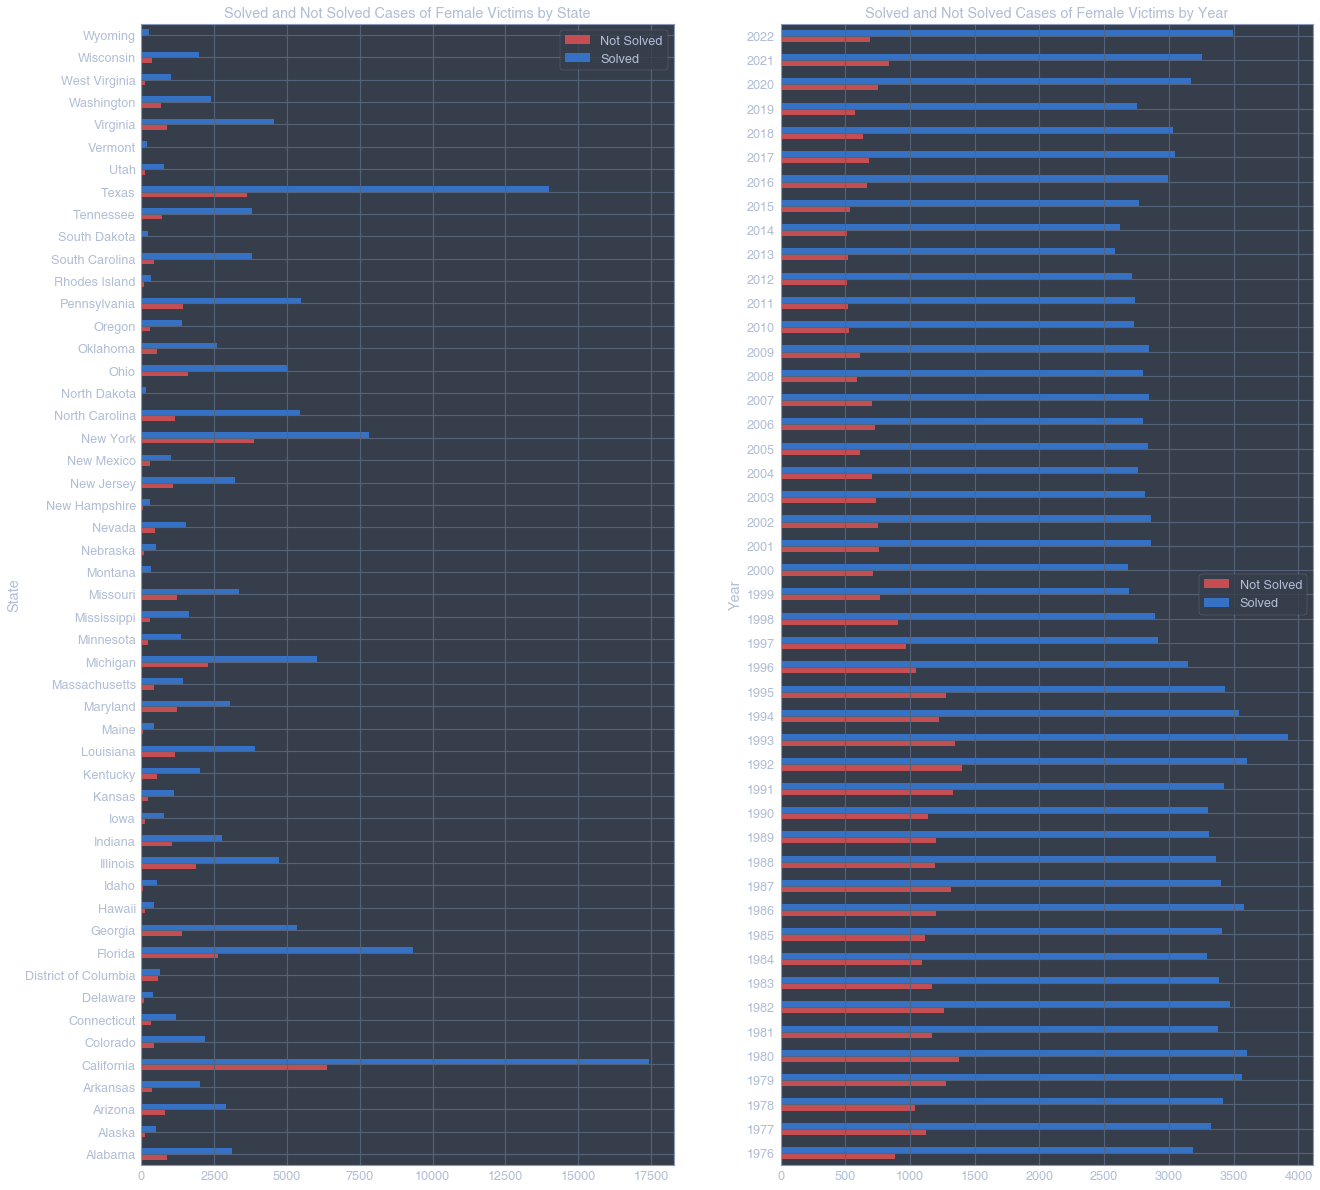

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

colors=['r', 'b']

by_state.plot(kind='barh', ax=ax[0], color=colors)
ax[0].set_title('Solved and Not Solved Cases of Female Victims by State')

by_year.plot(kind='barh', ax=ax[1], color=colors)
ax[1].set_title('Solved and Not Solved Cases of Female Victims by Year')

In [20]:
by_state['Prop'] = by_state['Solved'] / by_state['Not Solved']

In [25]:
by_state[by_state['Prop']<3]

,Not Solved,Solved,Prop
State,,,
California,6357,17422,2.740601
District of Columbia,586,622,1.061433
Illinois,1872,4712,2.517094
Indiana,1034,2779,2.687621
Maryland,1215,3059,2.517695
Michigan,2272,6038,2.657570
Missouri,1206,3338,2.767828
New Jersey,1090,3213,2.947706
New York,3864,7811,2.021480


In [27]:
by_state['Prop'].describe()

count    51.000000
mean      5.278726
std       3.300847
min       1.061433
25%       3.428937
50%       4.302521
75%       5.825772
max      20.750000
Name: Prop, dtype: float64

In [22]:
map_data.dtypes

CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

In [5]:
not_solved_f_by_age = not_solved_cases_f.groupby('VicAge').count()['CNTYFIPS']
not_solved_f_by_circumstance = not_solved_cases_f.groupby('Circumstance').count()['CNTYFIPS']
not_solved_f_by_weapon = not_solved_cases_f.groupby('Weapon').count()['CNTYFIPS']

<AxesSubplot:ylabel='Weapon'>

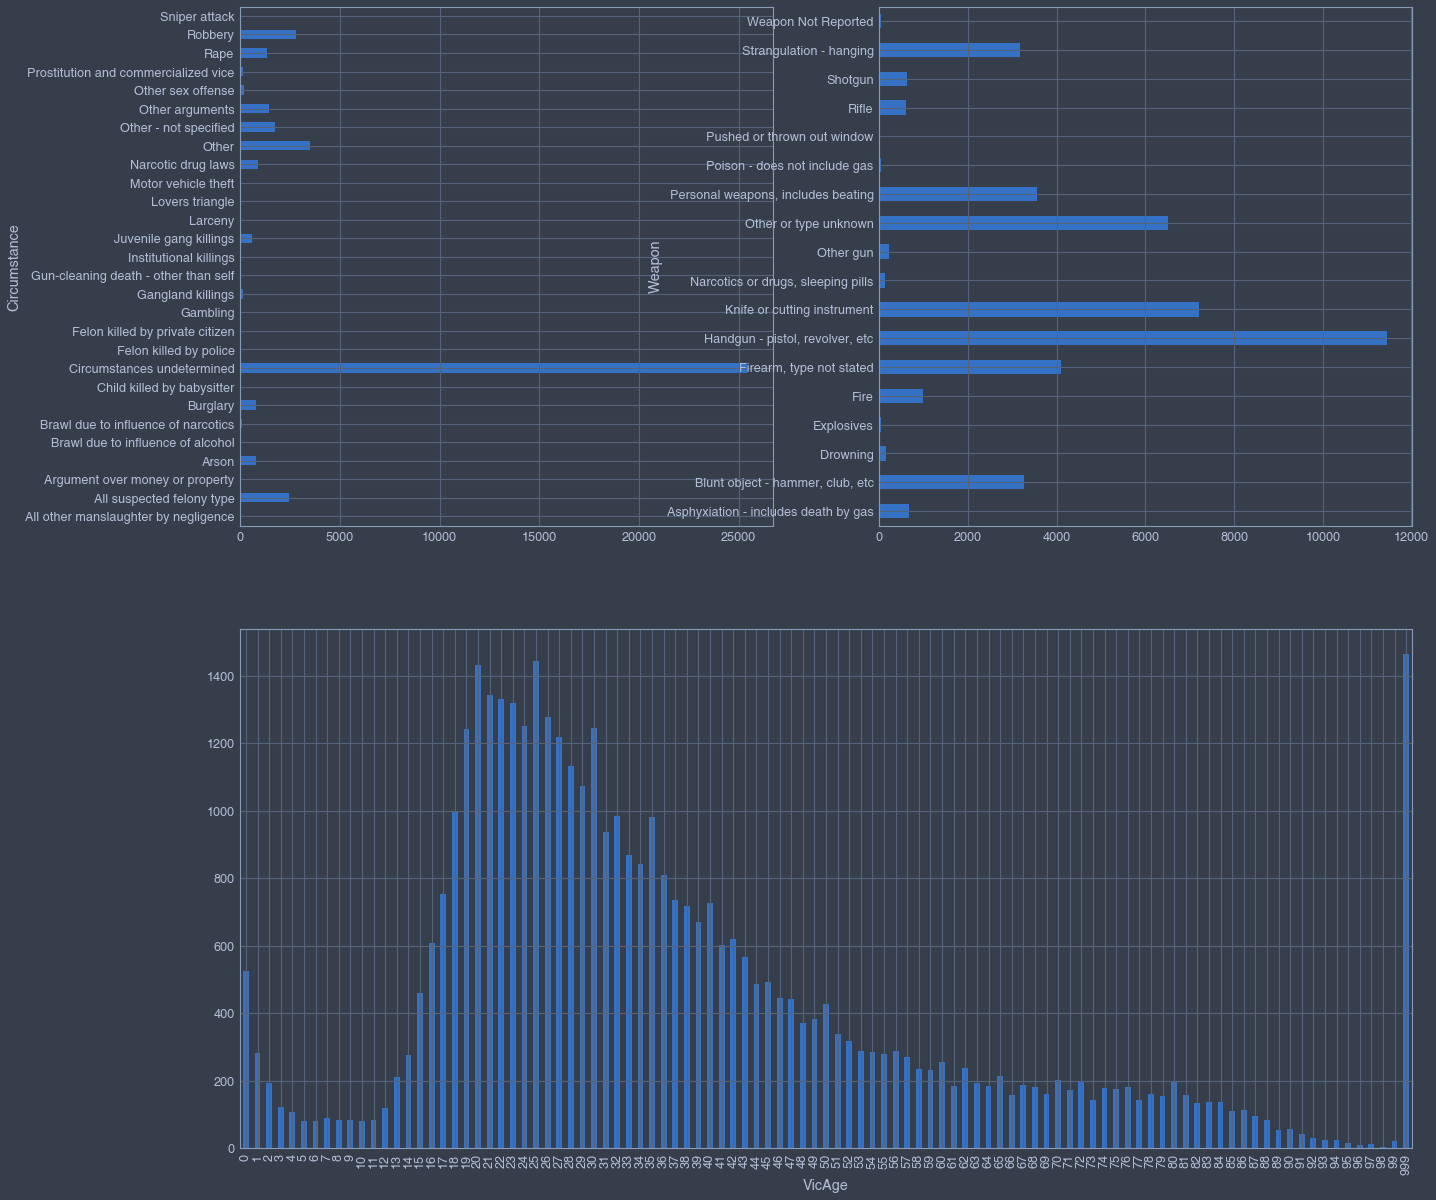

In [38]:
fig = plt.subplots(figsize=(21, 21))
ax1 = plt.subplot(212)
ax2 = plt.subplot(221)
ax3 = plt.subplot(222)
not_solved_f_by_age.plot(kind='bar', ax=ax1)
not_solved_f_by_circumstance.plot(kind='barh', ax=ax2)
not_solved_f_by_weapon.plot(kind='barh', ax=ax3)

In [10]:
not_solved_cases_f = not_solved_cases_f[(not_solved_cases_f['VicAge'] > 14) & (not_solved_cases_f['VicAge'] < 48)]

In [25]:
race_and_age = not_solved_cases_f.groupby(['VicRace', 'VicAge']).count()['CNTYFIPS'].loc['White'].to_frame()
race_and_age['Black'] = not_solved_cases_f.groupby(['VicRace', 'VicAge']).count()['CNTYFIPS'].loc['Black']
race_and_age.rename(columns={'CNTYFIPS': 'White'}, inplace=True)

Text(0.5, 1.0, 'Female, not solved cases')

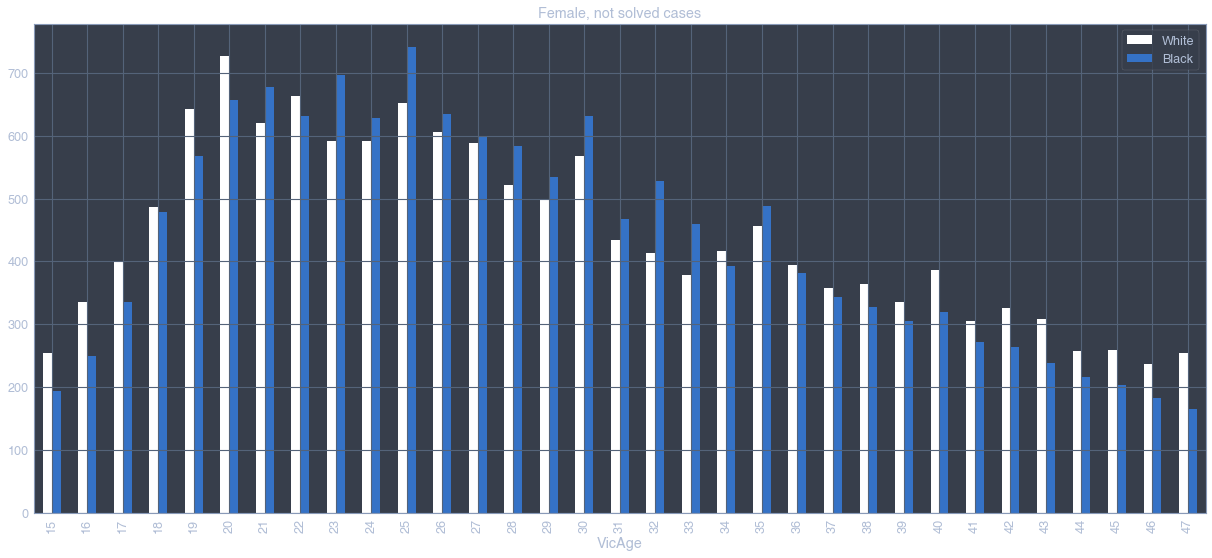

In [31]:
fig, ax = plt.subplots(figsize=(21, 9))
colors = ['w', 'b']
race_and_age.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Female, not solved cases')